In [2]:
### importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import plotly.express as px

In [3]:
from scipy.stats import zscore   #importing zscore

In [4]:
### importing the required dataset from the excel file

df_cars=pd.read_csv('train-data.csv')

df_cars.head(5)

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [5]:
#### to remove unnamed:0 column from the dataset

df_cars.drop(columns=df_cars.columns[0],axis=1,inplace=True)

In [6]:
df_cars.head(2)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

  New_Price  Price  
0       NaN   1.75  
1       NaN  12.50

## Dataset Understanding - Initial raw dataset

In [7]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


From the dataset, we are taking 'Price' as our target variable and the others as independent variables.

In the rough dataset, the nature of variables is as follows :-
    
    - Categorical :- Name, Location, Fuel_Type, Transmission, Owner_Type
    
    - Numerical :- Year, Kilometers_Driven, Seats, Price

Due to the presence of units in the columns Mileage, Engine,Power and New_Price, these have been wronly identified as 'object' datatypes. These will be corrected during the subsequent steps.          

In [8]:
## to check the shape of data before data cleaning and feature engineering

print('Shape of data before data cleaning and feature engineering is as follows :- ')

print('Number of rows:',df_cars.shape[0] ,'\nNumber of columns:',df_cars.shape[1])

Shape of data before data cleaning and feature engineering is as follows :- 
Number of rows: 6019 
Number of columns: 13


In [9]:
df_cars.describe(include='all')

Name Location         Year  Kilometers_Driven  \
count                     6019     6019  6019.000000       6.019000e+03   
unique                    1876       11          NaN                NaN   
top     Mahindra XUV500 W8 2WD   Mumbai          NaN                NaN   
freq                        49      790          NaN                NaN   
mean                       NaN      NaN  2013.358199       5.873838e+04   
std                        NaN      NaN     3.269742       9.126884e+04   
min                        NaN      NaN  1998.000000       1.710000e+02   
25%                        NaN      NaN  2011.000000       3.400000e+04   
50%                        NaN      NaN  2014.000000       5.300000e+04   
75%                        NaN      NaN  2016.000000       7.300000e+04   
max                        NaN      NaN  2019.000000       6.500000e+06   

       Fuel_Type Transmission Owner_Type    Mileage   Engine   Power  \
count       6019         6019       6019       6017     5983    5983   
unique         5            2          4        442      146     372   
top       Diesel       Manual      First  18.9 kmpl  1197 CC  74 bhp   
freq        3205         4299       4929        172      606     235   
mean         NaN          NaN        NaN        NaN      NaN     NaN   
std          NaN          NaN        NaN        NaN      NaN     NaN   
min          NaN          NaN        NaN        NaN      NaN     NaN   
25%          NaN          NaN        NaN        NaN      NaN     NaN   
50%          NaN          NaN        NaN        NaN      NaN     NaN   
75%          NaN          NaN        NaN        NaN      NaN     NaN   
max          NaN          NaN        NaN        NaN      NaN     NaN   

              Seats   New_Price        Price  
count   5977.000000         824  6019.000000  
unique          NaN         540          NaN  
top             NaN  63.71 Lakh          NaN  
freq            NaN           6          NaN  
mean       5.278735         NaN     9.479468  
std        0.808840         NaN    11.187917  
min        0.000000         NaN     0.440000  
25%        5.000000         NaN     3.500000  
50%        5.000000         NaN     5.640000  
75%        5.000000         NaN     9.950000  
max       10.000000         NaN   160.000000

Proper description of the columns 'Year', 'Kilometers_Driven','Seats' and 'Price' which are either of the int64 or float datatypes have been given.
 
 The dataset df_cars is having columns 'Mileage', 'Power','Engine' as object dataypes. This is because of these columns having units associated with them in their rows. This will be dealt with under the data cleaning section.

## Null value handling

In [10]:
## Finding null/missing values

df_cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

The columns 'Mileage','Engine','Power' and 'Seats' contain 2,36,36 and 42 null values respectively. These are 0.03%,0.60%,0.60% and 0.70% of the total number of rows(6019) under each column. So, we drop only the null-value containing rows under the corresponding columns.

Under the column 'New_Price', there are 5195 null values which equates to 86.31% of the total number of rows(6019) under 'New_Price'. Hence, we drop the entire 'New_Price' column.

In [11]:
df_cars.drop('New_Price',axis=1,inplace=True)

In [12]:
df_cars.dropna(how='any', inplace=True)

In [13]:
print('Shape of data after removing the null values is as follows :- ')

print('Number of rows:',df_cars.shape[0] ,'\nNumber of columns:',df_cars.shape[1])



Shape of data after removing the null values is as follows :- 
Number of rows: 5975 
Number of columns: 12


In [14]:
df_cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [15]:
df_cars.reset_index(drop=True).tail(5)

Name   Location  Year  Kilometers_Driven Fuel_Type  \
5970          Maruti Swift VDI      Delhi  2014              27365    Diesel   
5971  Hyundai Xcent 1.1 CRDi S     Jaipur  2015             100000    Diesel   
5972     Mahindra Xylo D4 BSIV     Jaipur  2012              55000    Diesel   
5973        Maruti Wagon R VXI    Kolkata  2013              46000    Petrol   
5974     Chevrolet Beat Diesel  Hyderabad  2011              47000    Diesel   

     Transmission Owner_Type     Mileage   Engine     Power  Seats  Price  
5970       Manual      First   28.4 kmpl  1248 CC    74 bhp    5.0   4.75  
5971       Manual      First   24.4 kmpl  1120 CC    71 bhp    5.0   4.00  
5972       Manual     Second   14.0 kmpl  2498 CC   112 bhp    8.0   2.90  
5973       Manual      First   18.9 kmpl   998 CC  67.1 bhp    5.0   2.65  
5974       Manual      First  25.44 kmpl   936 CC  57.6 bhp    5.0   2.50

### Checking the numerical data columns for any numerical data anomaly

###### 1) Year

In [16]:
df_cars[(df_cars['Year']<=1800)|(df_cars['Year']>=2021)]['Year']

Series([], Name: Year, dtype: int64)

'Year' data column does not have any data before than 1800 (The year 1886 is regarded as the birth year of the modern car when German inventor Karl Benz patented his 'Benz Patent-Motorwagen') and after 2021 (Year of checking the data).

Also, no null or negative values. However, the 'Year' is in 'int64' data type. This needs to be rectified.

'Year' is assumed to be the year in which the concerned car was manufactured.

For a better integration, the 'Year' column would be converted to 'Age' column(in the Feature Engineering section).

The 'Age' column would calculate the age of the concerned car, taking 2019 as the present year. This is because, the dataset that we are using, is from 2019. 

###### 2) Kilometers_Driven

In [17]:
df_cars[df_cars['Kilometers_Driven']<0]['Kilometers_Driven']

Series([], Name: Kilometers_Driven, dtype: int64)

'Kilometers_Driven' data column does not have any value less than 0 (absence of negative values)

###### 3) Mileage

In [18]:
df_cars[((df_cars['Mileage'].str.split().str[0].str.replace(".","").str.isdecimal())==False)&((df_cars['Mileage'].str.split().str[1]!='km/kg')|(df_cars['Mileage'].str.split().str[1]!='kmpl'))]['Mileage']

<ipython-input-18-ace9380eac7e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cars[((df_cars['Mileage'].str.split().str[0].str.replace(".","").str.isdecimal())==False)&((df_cars['Mileage'].str.split().str[1]!='km/kg')|(df_cars['Mileage'].str.split().str[1]!='kmpl'))]['Mileage']


Series([], Name: Mileage, dtype: object)

In [19]:
df_cars[df_cars['Mileage'].str.split().str[0].astype(float)<0]['Mileage']

Series([], Name: Mileage, dtype: object)

'Mileage' data column has no data which is negative or non-numerical (either whole numbers or decimal numbers).

Also, the units of the values in the data column are either in km/kg or kmpl. Hence, the data needs to be converted into a single unit.

###### 4) Engine

In [20]:
df_cars[((df_cars['Engine'].str.split().str[0].str.isdecimal())==False)|(df_cars['Engine'].str.split().str[1]!='CC')]['Engine']

Series([], Name: Engine, dtype: object)

In [21]:
df_cars[df_cars['Engine'].str.split().str[0].astype(float)<0]['Engine']

Series([], Name: Engine, dtype: object)

'Engine' data column has no data which is negative or non-numerical (either whole numbers or decimal numbers).

Also, the units of the entire data column is in 'CC'. Hence, no need for any conversion of units.

###### 5) Power

In [22]:
df_cars[((df_cars['Power'].str.split().str[0].str.replace(".","").str.isdecimal())==False)|(df_cars['Power'].str.split().str[1]!='bhp')]['Power']

<ipython-input-22-60f9cc9b0c7f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cars[((df_cars['Power'].str.split().str[0].str.replace(".","").str.isdecimal())==False)|(df_cars['Power'].str.split().str[1]!='bhp')]['Power']


76      null bhp
79      null bhp
89      null bhp
120     null bhp
143     null bhp
          ...   
5861    null bhp
5873    null bhp
5925    null bhp
5943    null bhp
5985    null bhp
Name: Power, Length: 103, dtype: object

We can see that there are 103 rows under 'Power' data column that are having data entered as 'null bhp'. Since 103 rows is only 1.7% of the 5975 rows n the dataset, we remove these rows from the dataset.

In [23]:
df_cars.drop((df_cars[((df_cars['Power'].str.split().str[0].str.replace(".","").str.isdecimal())==False)|(df_cars['Power'].str.split().str[1]!='bhp')]).index, inplace=True)

<ipython-input-23-4e2c3c434df3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cars.drop((df_cars[((df_cars['Power'].str.split().str[0].str.replace(".","").str.isdecimal())==False)|(df_cars['Power'].str.split().str[1]!='bhp')]).index, inplace=True)


In [24]:
df_cars[df_cars['Power'].str.split().str[0].astype(float)<0]['Power']

Series([], Name: Power, dtype: object)

After removal of the rows containing 'null bhp', the 'Power' data column has no data which is negative or non-numerical (either whole numbers or decimal numbers).

Also, the units of the entire data column is in 'bhp'. Hence, no need for any conversion of units.

###### 6) Seats

In [25]:
df_cars[df_cars['Seats']<=0]['Seats']

Series([], Name: Seats, dtype: float64)

The 'Seats' data column has no data which is negative or non-numerical (only positive whole numbers are present).

###### 7) Price

In [26]:
df_cars[df_cars['Price']<0]['Price']

Series([], Name: Price, dtype: float64)

The 'Price' data column has no data which is negative or non-numerical (either whole numbers or decimal numbers).

#### Checking the categorical data columns

###### 1) Name

In [27]:
df_cars['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

'Name' contains the names of several cars that were sold in the Indian pre-owned cars market. For better analysis, the column has to be split into 2 as follows :- 
    
    (1) Brand - which would have the name of the car manufacturer
    (2) Model - which would have the name of the car model, including the variant



There would also be a new column 'Model_Type' that would be added. This would have classification of the cars based on its body type.

###### 2) Location

In [28]:
df_cars['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

Our dataset has data from 11 locations, namely - Mumbai, Hyderabad, Kochi, Coimbatore, Pune, Delhi, Kolkata, Chennai, Jaipur, Bangalore and Ahmedabad.

Out of these locations, the largest group of data is from Mumbai while the smallest is from Ahmedabad.

###### 3) Fuel_Type

In [29]:
df_cars['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

Our dataset has data about cars using 4 different fuel types , namely - Diesel, Petrol, CNG and LPG. 

Out of these fuel types, the largest group of cars run on Diesel while the smallest group run on LPG.

###### 4) Transmission

In [30]:
df_cars['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

Our dataset has data about cars having 2 different transmission  types , namely - Manual and Automatic. 

Highest number of cars have Manual transmission while the cars having Automatic transmission is significantly lower.

###### 5) Owner_Type

In [31]:
df_cars['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

Our dataset has data about pre-owned cars in the market, based on the number of owners the cars have had, namely - First, Second, Third, Fourth & Above.

Most of the pre-owned cars in our data have had only 1 owner, prior to the sale. The number of pre-owned cars that have had 4 or more owners, prior to the sale, is significantly low.

## FEATURE ENGINEERING

#### 1) Splitting 'Name' column into 'Brand' and 'Model'

In [32]:
df_cars.insert(1,column='Brand', value=df_cars['Name'].str.split(" ",1).str[0])
df_cars.insert(2,column='Model', value=df_cars['Name'].str.split(" ",1).str[1])
df_cars.drop('Name',axis=1,inplace=True)

In [33]:
df_cars.head(2)

Brand                     Model Location  Year  Kilometers_Driven  \
0   Maruti           Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai  Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

   Price  
0   1.75  
1  12.50

In [34]:
df_cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

We can see that there is a duplication of the brand 'ISUZU' as 'Isuzu'. We shall combine both to the single entity 'ISUZU'

In [35]:
df_cars.loc[df_cars.Brand=='Isuzu','Brand']='ISUZU'

In [36]:
df_cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

#### 2) Extracting numerical values from the columns - 'Engine' and 'Power' 

The numerical values can be safely extracted, since all the values in each of the columns are in the same corresponding units- CC and bhp respectively.

The data type of the column is also being changed from 'object' to 'float' and 'int' respectively

In [37]:
df_cars['Power']=df_cars['Power'].str.split().str[0].astype(float)
df_cars['Engine']=df_cars['Engine'].str.split().str[0].astype(int)

In [38]:
df_cars.head(2)

Brand                     Model Location  Year  Kilometers_Driven  \
0   Maruti           Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai  Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First  26.6 km/kg     998   58.16    5.0   1.75  
1    Diesel       Manual      First  19.67 kmpl    1582  126.20    5.0  12.50

#### 3) Changing the datatype of 'Seats' to int

In [39]:
df_cars['Seats']=df_cars['Seats'].astype(int)

#### 4) Converting data in 'Mileage' into single unit and forming a new column 'Mileage_Converted', with the converted data

Basis for conversion:-
    
1) For CNG:
    Density at fixed temperature and pressure = 0.71.
   
       Based on the formula density=mass(Kg)/volume(L),
        
           1 Kg of CNG ~ 1.4 Litres of CNG
        
               So, 1 Km/Kg ~ 1/1.4 Kmpl
        

2) For LPG:
    Density at fixed temperature and pressure = 0.53.
    
        Based on the formula density=mass(Kg)/volume(L),
        
            1 Kg of LPG ~ 1.9 Litres of CNG
        
                So, 1 Km/Kg ~ 1/1.9 Kmpl

In [40]:
conditions = [df_cars['Fuel_Type']=='CNG',
              df_cars['Fuel_Type']=='LPG']

choices=[(df_cars['Mileage'].str.split().str[0].astype(float)/1.4).round(2),(df_cars['Mileage'].str.split().str[0].astype(float)/1.9).round(2)]

df_cars['Mileage_Converted'] = np.select(conditions, choices, default= df_cars['Mileage'].str.split().str[0].astype(float))



#### 4a) Removing units from the 'Mileage' column and displaying only the numerical value 

The units would have to be removed from the 'Mileage' column for the sake of model builidng and visualisation.

The units would however remain as follows, although they are not displayed in the 'Mileage' column :-

For cars having 'Fuel_Type' as 'CNG', the unit of 'Mileage' = km/kg

For cars having 'Fuel_Type' as 'LPG', the unit of 'Mileage' = km/kg

For cars having 'Fuel_Type' as 'Petrol', the unit of 'Mileage' = kmpl

For cars having 'Fuel_Type' as 'DIesel', the unit of 'Mileage' = kmpl

In [41]:
df_cars['Mileage']=df_cars['Mileage'].str.split().str[0].astype(float)

#### 5) Arranging the order of columns to have 'Mileage_Converted' next to 'Mileage'

In [42]:
df_cars= df_cars[['Brand','Model','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Mileage_Converted','Engine','Power','Seats','Price']]

In [43]:
df_cars.drop('Mileage',axis=1,inplace=True)  #dropping the 'Mileage' feature, since it has been converted to 'Mileage_Converted'

In [44]:
df_cars.head(2)

Brand                     Model Location  Year  Kilometers_Driven  \
0   Maruti           Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai  Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type  Mileage_Converted  Engine   Power  Seats  \
0       CNG       Manual      First              19.00     998   58.16      5   
1    Diesel       Manual      First              19.67    1582  126.20      5   

   Price  
0   1.75  
1  12.50

###### Feature Engineering would continue after the Outliers' handling...

## Outliers and its handling

In [45]:
def detect_outliers(df_cars):
    outliers = []
    threshold = 3
    mean = np.mean(df_cars)
    std = np.std(df_cars)
    for i in df_cars :
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return (outliers)

#### 1) Kilometers_Driven

In [46]:
sorted(detect_outliers(df_cars['Kilometers_Driven']))

[445000, 480000, 480000, 620000, 720000, 775000, 6500000]

#### 2) Mileage_Converted

In [47]:
np.array(detect_outliers(df_cars['Mileage_Converted']))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 3) Engine

In [48]:
np.array(sorted(detect_outliers(df_cars['Engine'])))

array([3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498,
       3498, 3597, 3597, 4134, 4134, 4134, 4134, 4134, 4134, 4134, 4134,
       4367, 4367, 4367, 4367, 4367, 4395, 4395, 4395, 4806, 4806, 4806,
       4806, 4951, 5000, 5000, 5204, 5461, 5461, 5461, 5998])

#### 4) Power

In [49]:
np.array(sorted(detect_outliers(df_cars['Power'])))

array([281.61, 282.  , 282.  , 282.  , 282.  , 300.  , 300.  , 300.  ,
       300.  , 300.  , 301.73, 306.  , 306.  , 306.  , 306.  , 306.  ,
       306.  , 308.  , 308.  , 308.  , 308.43, 308.43, 313.  , 313.  ,
       313.  , 313.  , 313.  , 320.  , 320.  , 321.  , 333.  , 335.2 ,
       335.2 , 335.2 , 335.2 , 335.2 , 335.2 , 335.3 , 335.3 , 340.  ,
       362.07, 362.07, 362.9 , 364.9 , 364.9 , 364.9 , 367.  , 382.  ,
       387.3 , 394.3 , 394.3 , 395.  , 402.  , 421.  , 444.  , 444.  ,
       450.  , 450.  , 488.1 , 500.  , 503.  , 550.  , 552.  , 560.  ])

#### 5) Seats

In [50]:
np.array(sorted(detect_outliers(df_cars['Seats'])))

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10])

#### 6) Price

In [51]:
np.array(sorted(detect_outliers(df_cars['Price'])))

array([ 43.35,  43.6 ,  43.74,  43.78,  44.  ,  44.  ,  44.  ,  44.  ,
        44.  ,  44.  ,  44.5 ,  44.56,  44.76,  44.83,  45.  ,  45.  ,
        45.  ,  45.  ,  45.  ,  45.  ,  45.  ,  45.  ,  45.  ,  45.  ,
        45.  ,  45.52,  45.61,  45.62,  45.64,  45.73,  45.77,  45.82,
        45.86,  46.  ,  46.95,  47.35,  47.5 ,  47.5 ,  47.7 ,  48.  ,
        48.  ,  48.  ,  48.  ,  48.  ,  48.  ,  48.22,  48.5 ,  48.5 ,
        48.63,  48.76,  48.91,  49.  ,  49.  ,  49.  ,  49.22,  49.24,
        49.79,  50.  ,  50.22,  50.29,  50.5 ,  50.66,  50.97,  51.  ,
        51.35,  51.43,  51.52,  51.69,  52.  ,  52.  ,  52.  ,  52.5 ,
        52.5 ,  52.54,  53.11,  53.83,  54.  ,  54.  ,  54.45,  55.  ,
        55.  ,  55.54,  55.7 ,  55.76,  56.  ,  56.  ,  56.  ,  56.  ,
        56.14,  56.5 ,  56.73,  56.8 ,  57.  ,  57.  ,  58.  ,  58.54,
        58.73,  58.91,  59.  ,  59.29,  59.65,  59.72,  60.  ,  60.75,
        60.95,  61.25,  61.29,  62.67,  62.81,  64.  ,  64.75,  64.87,
      

### Due to the presence of large volume of outliers, to avoid the unnecessary loss of data, we will be removing only the following entities that seem as an anomaly :-
    
    1) Kilometers_Driven  - 6500000 (1 data row)
    2) Mileage_Converted - 0 (28 data rows)

#### Anomalies in the dataset

In [52]:
## 'Kilometers_Driven' anomalies (Kilometers_Driven  greater than or equal to 775000)

df_cars[(df_cars['Kilometers_Driven']>775000)]

Brand                  Model Location  Year  Kilometers_Driven Fuel_Type  \
2328   BMW  X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage_Converted  Engine  Power  Seats  Price  
2328    Automatic      First              15.97    2993  258.0      5   65.0

In [53]:
## 'Mileage_Converted' anomalies  (Mileage_Converted  less than or equal to 0)

df_cars[df_cars['Mileage_Converted']<=0]

Brand                          Model    Location  Year  \
14             Land      Rover Freelander 2 TD4 SE        Pune  2012   
67    Mercedes-Benz     C-Class Progressive C 220d  Coimbatore  2019   
544   Mercedes-Benz  New C-Class Progressive C 200       Kochi  2019   
707   Mercedes-Benz          M-Class ML 350 4Matic        Pune  2014   
962   Mercedes-Benz     C-Class Progressive C 220d      Mumbai  2018   
996         Hyundai                 Santro Xing GL        Pune  2008   
1059        Hyundai                 Santro Xing GL   Hyderabad  2010   
1259           Land       Rover Freelander 2 TD4 S   Bangalore  2010   
1308  Mercedes-Benz          M-Class ML 350 4Matic   Bangalore  2014   
1354        Hyundai                 Santro Xing GL       Kochi  2011   
1764  Mercedes-Benz          M-Class ML 350 4Matic        Pune  2015   
2681          Skoda              Superb 3.6 V6 FSI   Hyderabad  2010   
3044        Hyundai                 Santro Xing GL     Kolkata  2009   
3093           Audi         A7 2011-2015 Sportback     Kolkata  2012   
3210  Mercedes-Benz          M-Class ML 350 4Matic  Coimbatore  2016   
3271        Hyundai                 Santro Xing GL   Bangalore  2008   
4234  Mercedes-Benz          M-Class ML 350 4Matic     Chennai  2012   
4302        Hyundai                 Santro Xing GL       Delhi  2012   
4412  Mercedes-Benz          M-Class ML 350 4Matic  Coimbatore  2016   
4687           Land      Rover Freelander 2 TD4 SE      Jaipur  2012   
4704  Mercedes-Benz          M-Class ML 350 4Matic   Bangalore  2015   
5016           Land     Rover Freelander 2 TD4 HSE       Delhi  2013   
5022           Land      Rover Freelander 2 TD4 SE   Hyderabad  2013   
5311           Land      Rover Freelander 2 TD4 SE   Hyderabad  2012   
5374  Mercedes-Benz          M-Class ML 350 4Matic   Ahmedabad  2012   
5875  Mercedes-Benz     C-Class Progressive C 220d   Ahmedabad  2019   
5972        Hyundai                 Santro Xing GL      Mumbai  2008   
6011          Skoda              Superb 3.6 V6 FSI   Hyderabad  2009   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_Converted  \
14                85000    Diesel    Automatic     Second                0.0   
67                15369    Diesel    Automatic      First                0.0   
544               13190    Petrol    Automatic      First                0.0   
707              120000    Diesel    Automatic      First                0.0   
962                8682    Diesel    Automatic      First                0.0   
996               93000    Petrol       Manual      First                0.0   
1059              58163    Petrol       Manual      First                0.0   
1259             125000    Diesel    Automatic     Second                0.0   
1308              33000    Diesel    Automatic     Second                0.0   
1354              20842    Petrol       Manual      First                0.0   
1764              69000    Diesel    Automatic      First                0.0   
2681              54000    Petrol    Automatic      First                0.0   
3044              60170    Petrol       Manual      First                0.0   
3093              24720    Diesel    Automatic     Second                0.0   
3210              22769    Diesel    Automatic      First                0.0   
3271              35268    Petrol       Manual     Second                0.0   
4234              63000    Diesel    Automatic      First                0.0   
4302              61449    Petrol       Manual      First                0.0   
4412              27833    Diesel    Automatic      First                0.0   
4687             119203    Diesel    Automatic      First                0.0   
4704              20000    Diesel    Automatic      First                0.0   
5016              72000    Diesel    Automatic      First                0.0   
5022              46000    Diesel    Automatic     Second                0.0   
5311 

### Dataset after removing the above mentioned anomalies

In [54]:
df_cars = df_cars[(df_cars['Kilometers_Driven']!=6500000) & (df_cars['Mileage_Converted']!=0)]

In [55]:
df_cars.reset_index(drop=True)

Brand                       Model    Location  Year  \
0        Maruti             Wagon R LXI CNG      Mumbai  2010   
1       Hyundai    Creta 1.6 CRDi SX Option        Pune  2015   
2         Honda                      Jazz V     Chennai  2011   
3        Maruti                  Ertiga VDI     Chennai  2012   
4          Audi  A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...         ...                         ...         ...   ...   
5838     Maruti                   Swift VDI       Delhi  2014   
5839    Hyundai            Xcent 1.1 CRDi S      Jaipur  2015   
5840   Mahindra                Xylo D4 BSIV      Jaipur  2012   
5841     Maruti                 Wagon R VXI     Kolkata  2013   
5842  Chevrolet                 Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_Converted  \
0                 72000       CNG       Manual      First              19.00   
1                 41000    Diesel       Manual      First              19.67   
2                 46000    Petrol       Manual      First              18.20   
3                 87000    Diesel       Manual      First              20.77   
4                 40670    Diesel    Automatic     Second              15.20   
...                 ...       ...          ...        ...                ...   
5838              27365    Diesel       Manual      First              28.40   
5839             100000    Diesel       Manual      First              24.40   
5840              55000    Diesel       Manual     Second              14.00   
5841              46000    Petrol       Manual      First              18.90   
5842              47000    Diesel       Manual      First              25.44   

      Engine   Power  Seats  Price  
0        998   58.16      5   1.75  
1       1582  126.20      5  12.50  
2       1199   88.70      5   4.50  
3       1248   88.76      7   6.00  
4       1968  140.80      5  17.74  
...      ...     ...    ...    ...  
5838    1248   74.00      5   4.75  
5839    1120   71.00      5   4.00  
5840    2498  112.00      8   2.90  
5841     998   67.10      5   2.65  
5842     936   57.60      5   2.50  

[5843 rows x 13 columns]

## FEATURE ENGINEERING continuation

#### 7) Adding a new column 'Model_Type' which has classification of cars based on body type

For this project, we have created a separte document having details about the body type of all the car models (given under the column 'Model')

The details about the body type of each car, have been taken from the websites cars24.com and cardekho.com

The cars have been broadly classified under the following broad categories :-
    
    (1) Hatchback
    
    (2) Sedan
    
    (3) SUV/MUV/MPV (This also includes pickups and minivans)
    
    (4) Convertible/Coupe

In [56]:
### importing the required dataset from the excel file

df_model_type=pd.read_csv('Brand_Model_Type.csv')

df_model_type.head(6)

Brand                   Model Model_Type
0  Ambassador     Classic Nova Diesel      Sedan
1        Audi    A3 35 TDI Attraction      Sedan
2        Audi       A3 35 TDI Premium      Sedan
3        Audi  A3 35 TDI Premium Plus      Sedan
4        Audi    A3 35 TDI Technology      Sedan
5        Audi             A4 1.8 TFSI      Sedan

In [57]:
##  Mapping the values in the 'df_mode_type'  dataset to our parent dataset 'df_cars'

df_cars=pd.merge(df_cars,df_model_type,on=['Brand','Model'], how='left' )


## Arranging the columns of the 'df_cars' dataset

df_cars= df_cars[['Brand', 'Model','Model_Type', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_Converted', 'Engine', 'Power',
       'Seats', 'Price']]

In [58]:
df_cars.head(2)

Brand                     Model   Model_Type Location  Year  \
0   Maruti           Wagon R LXI CNG    Hatchback   Mumbai  2010   
1  Hyundai  Creta 1.6 CRDi SX Option  SUV/MUV/MPV     Pune  2015   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_Converted  \
0              72000       CNG       Manual      First              19.00   
1              41000    Diesel       Manual      First              19.67   

   Engine   Power  Seats  Price  
0     998   58.16      5   1.75  
1    1582  126.20      5  12.50

##### Model' and 'Model_Type' data columns are related. To avoid data redundancy, we shall drop the 'Model' data column.

In [59]:
df_cars.drop('Model',axis=1,inplace=True)

In [60]:
df_cars.head(2)

Brand   Model_Type Location  Year  Kilometers_Driven Fuel_Type  \
0   Maruti    Hatchback   Mumbai  2010              72000       CNG   
1  Hyundai  SUV/MUV/MPV     Pune  2015              41000    Diesel   

  Transmission Owner_Type  Mileage_Converted  Engine   Power  Seats  Price  
0       Manual      First              19.00     998   58.16      5   1.75  
1       Manual      First              19.67    1582  126.20      5  12.50

#### 8) Converting the 'Year' column into 'Age' column

'Year' is assumed to be the year in which the concerned car was manufactured.

For a better integration, the 'Year' column would be converted to 'Age' column.

The 'Age' column would calculate the age of the concerned car, taking 2019 as the present year. This is because, the dataset that we are using, is from 2019. 

In [61]:
## Subtracting the 'Year' from 2019(the year taken as the present year, would given age of the car)

df_cars['Age']= 2019-(df_cars['Year'])



## Arranging the columns of the 'df_cars' dataset

df_cars= df_cars[['Brand', 'Model_Type','Fuel_Type','Transmission', 'Owner_Type', 'Location', 'Year','Age', 'Kilometers_Driven', 'Mileage_Converted','Engine', 'Power', 'Seats', 'Price']]

In [62]:
df_cars.head(2)

Brand   Model_Type Fuel_Type Transmission Owner_Type Location  Year  Age  \
0   Maruti    Hatchback       CNG       Manual      First   Mumbai  2010    9   
1  Hyundai  SUV/MUV/MPV    Diesel       Manual      First     Pune  2015    4   

   Kilometers_Driven  Mileage_Converted  Engine   Power  Seats  Price  
0              72000              19.00     998   58.16      5   1.75  
1              41000              19.67    1582  126.20      5  12.50

##### 'Year' and 'Age' data columns are related. To avoid data redundancy, we shall drop the 'Year' data column.

In [63]:
df_cars.drop('Year',axis=1,inplace=True)

In [64]:
### The final, base dataset that would be used for visualization and other subsequent steps


df_cars

Brand   Model_Type Fuel_Type Transmission Owner_Type    Location  \
0        Maruti    Hatchback       CNG       Manual      First      Mumbai   
1       Hyundai  SUV/MUV/MPV    Diesel       Manual      First        Pune   
2         Honda    Hatchback    Petrol       Manual      First     Chennai   
3        Maruti  SUV/MUV/MPV    Diesel       Manual      First     Chennai   
4          Audi        Sedan    Diesel    Automatic     Second  Coimbatore   
...         ...          ...       ...          ...        ...         ...   
5838     Maruti    Hatchback    Diesel       Manual      First       Delhi   
5839    Hyundai        Sedan    Diesel       Manual      First      Jaipur   
5840   Mahindra  SUV/MUV/MPV    Diesel       Manual     Second      Jaipur   
5841     Maruti    Hatchback    Petrol       Manual      First     Kolkata   
5842  Chevrolet    Hatchback    Diesel       Manual      First   Hyderabad   

      Age  Kilometers_Driven  Mileage_Converted  Engine   Power  Seats  Price  
0       9              72000              19.00     998   58.16      5   1.75  
1       4              41000              19.67    1582  126.20      5  12.50  
2       8              46000              18.20    1199   88.70      5   4.50  
3       7              87000              20.77    1248   88.76      7   6.00  
4       6              40670              15.20    1968  140.80      5  17.74  
...   ...                ...                ...     ...     ...    ...    ...  
5838    5              27365              28.40    1248   74.00      5   4.75  
5839    4             100000              24.40    1120   71.00      5   4.00  
5840    7              55000              14.00    2498  112.00      8   2.90  
5841    6              46000              18.90     998   67.10      5   2.65  
5842    8              47000              25.44     936   57.60      5   2.50  

[5843 rows x 13 columns]

## Dataset Understanding - Processed dataset 


In [65]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5843 entries, 0 to 5842
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5843 non-null   object 
 1   Model_Type         5843 non-null   object 
 2   Fuel_Type          5843 non-null   object 
 3   Transmission       5843 non-null   object 
 4   Owner_Type         5843 non-null   object 
 5   Location           5843 non-null   object 
 6   Age                5843 non-null   int64  
 7   Kilometers_Driven  5843 non-null   int64  
 8   Mileage_Converted  5843 non-null   float64
 9   Engine             5843 non-null   int32  
 10  Power              5843 non-null   float64
 11  Seats              5843 non-null   int32  
 12  Price              5843 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(6)
memory usage: 593.4+ KB


# ------------------------------- DATA VISUALIZATION -----------------------------------------

#### 1) Distribution of numerical data features

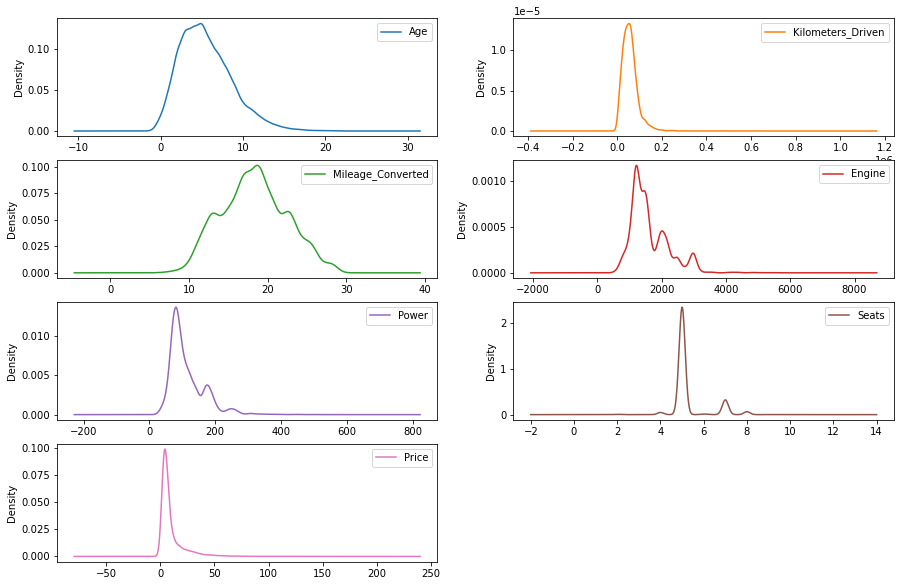

In [66]:
plt.rcParams["figure.figsize"] = (15,10)

df_cars.plot(kind='density',subplots=True, sharex=False, layout=(4,2))
plt.show()

In [67]:
print("Age of the car - 'Age' : \n", df_cars.Age.describe(),'\n')
print("Distance Covered by the car in Kilometers - 'Kilometers_Driven' :\n", df_cars.Kilometers_Driven.describe(),'\n')
print("Mileage of the car in Kilometers/Litre - 'Mileage_Converted' :\n", df_cars.Mileage_Converted.describe(),'\n')
print("Engine capacity of the car in CC - 'Engine' :\n", df_cars.Engine.describe(),'\n')
print("Power of the car in bhp - 'Power' :\n", df_cars.Power.describe(),'\n')
print("Seats in the car - 'Seats' :\n", df_cars.Seats.describe(),'\n')
print("Price in Lakhs - 'Price' : \n", df_cars.Price.describe(),'\n')

Age of the car - 'Age' : 
 count    5843.000000
mean        5.519596
std         3.163482
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        21.000000
Name: Age, dtype: float64 

Distance Covered by the car in Kilometers - 'Kilometers_Driven' :
 count      5843.000000
mean      57224.501284
std       37773.045190
min         171.000000
25%       33490.500000
50%       52553.000000
75%       72405.500000
max      775000.000000
Name: Kilometers_Driven, dtype: float64 

Mileage of the car in Kilometers/Litre - 'Mileage_Converted' :
 count    5843.00000
mean       18.28135
std         4.11958
min         6.40000
25%        15.29000
50%        18.20000
75%        21.10000
max        28.40000
Name: Mileage_Converted, dtype: float64 

Engine capacity of the car in CC - 'Engine' :
 count    5843.000000
mean     1622.600034
std       598.772591
min       624.000000
25%      1198.000000
50%      1495.000000
75%      1984.000000
max      5998.000000
Nam

In [68]:
df_cars.skew()

Age                  0.824621
Kilometers_Driven    4.317791
Mileage_Converted    0.114339
Engine               1.427928
Power                1.930116
Seats                1.907071
Price                3.370826
dtype: float64

The following data columns exhibit high Positivie/Right skewness : Kilometers_Driven,Engine,Power,Seats,Price

The following data columns exhibit moderate Positive/Right skewness : Age

The following data column is approximately symmetric/normally distributed : Mileage_Converted

In [69]:
df_cars.kurt()

Age                   0.911852
Kilometers_Driven    55.894206
Mileage_Converted    -0.482610
Engine                3.203972
Power                 6.608526
Seats                 4.037775
Price                17.527449
dtype: float64

The following data columns are considered approximately Normal (Mesokurtic) - Age, Mileage_Converted

The following data columns exhibit Peakedness (Leptokurtic) - Kilometers_Driven,Engine,Power,Seats,Price

#### 2) Pairwise relationship between numerical variables

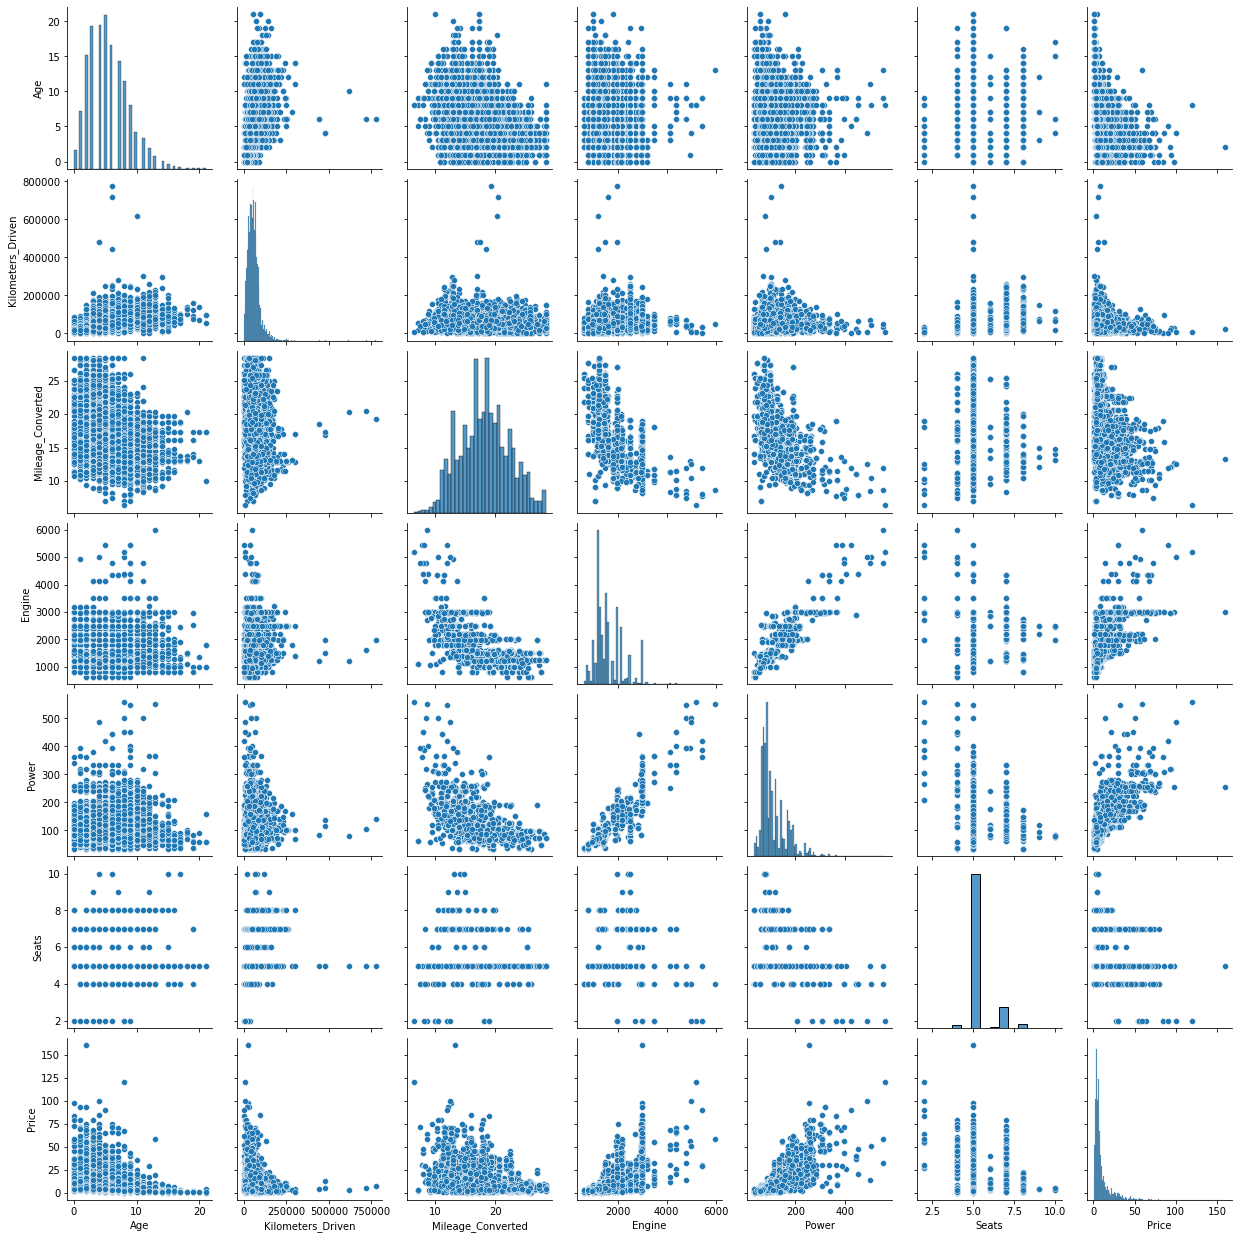

In [70]:
sns.pairplot(df_cars)
plt.show()

The above pairplot shows the relationship between the various numerical variables in our dataset.

The diagonal graphs (from the topmost left to the bottom most right) show the distribution of the respective feature. The other graphs show the relationship between the feature on the X-axis and the feature on the Y-axis.

Some of the predominant aspects that can be inferred from the above set are as follows:-

    1) Price decreases as the Age increases
    
    2) Lower the Kilometers_Driven, higher will be their Price
    
    3) Cars with higher engine capacity tend to have a lower Mileage
    
    4) Cars with higher Power tend to have a lower Mileage
    
    5) Cars with higher engine capacity tend to have a higher Price
    
    6) Cars with higher engine capacity have higher Power
    
    7) Cars with higher Power tend to have a higher Price
    
    8) Cars with lower Power tend to have more number of Seats
    
    
Further visual analysis will be done in the following sections to understand the relation of our target variable - Price, with the other features.

#### 3) 'Price'

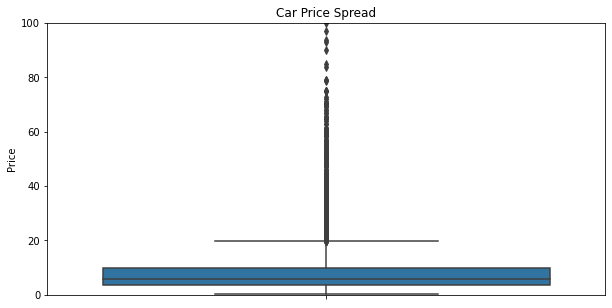

count    5843.000000
mean        9.536024
std        11.164542
min         0.440000
25%         3.515000
50%         5.700000
75%        10.000000
max       160.000000
Name: Price, dtype: float64


In [71]:
plt.figure(figsize = (10, 5))
plt.title('Car Price Spread')
sns.boxplot(y=df_cars.Price)
plt.ylim(0,100)
plt.show()
print(df_cars.Price.describe())

According to the boxplot, the price field has an average value of around 9.54L and a median around 5.7L. The most expensive car values at 1.6Cr and the cheapest cars at 44k.

The maximum price range of cars is around 9-10 Lakhs

###### 4A) Brand breakdown

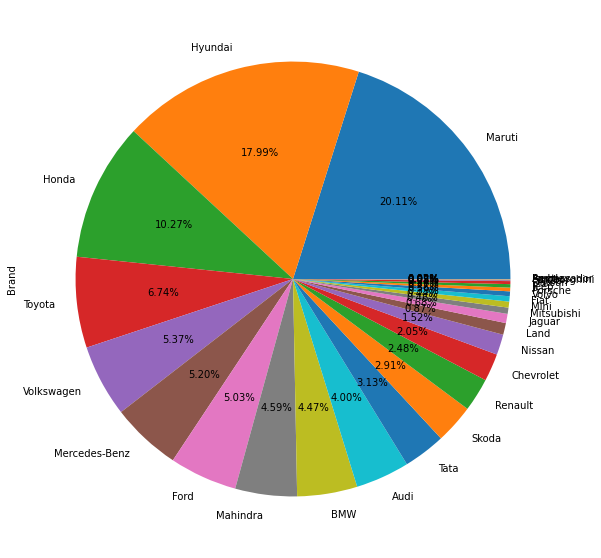

In [72]:
plt.figure(figsize=(15,10))
df_cars['Brand'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

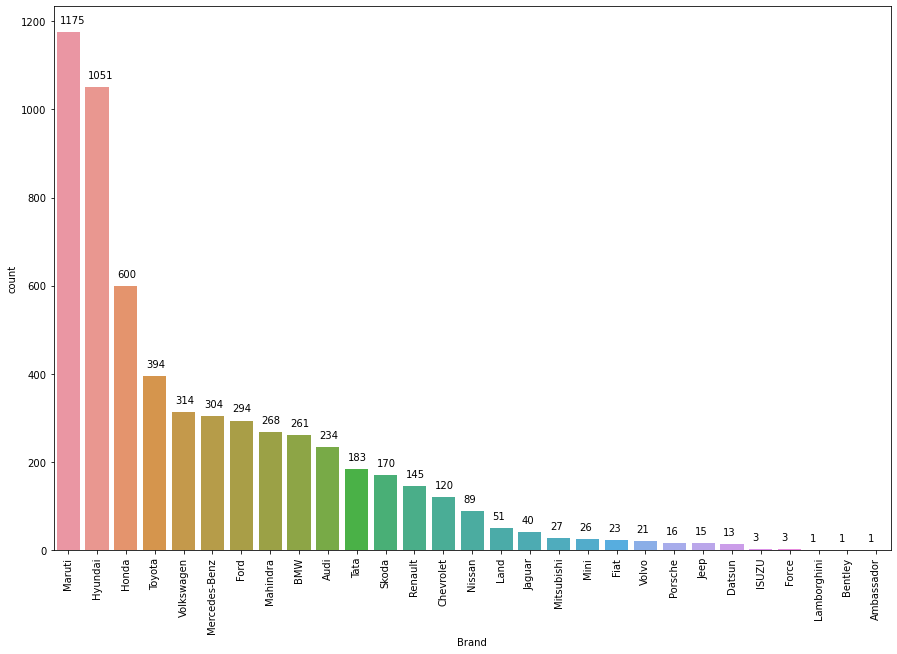

In [73]:
plt.figure(figsize=(15,10))

plt.xticks(rotation = 90)
order = df_cars['Brand'].value_counts(ascending=False).index
ax=sns.countplot(x='Brand', data=df_cars, order=order)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

plt.show()

1) Maruti, 2) Hyundai, 3) Honda

These cars have the largest population. They are the widely used brands. This might be due to their lower price. 

Premium cars like Bentley and Lamborghini are among the brands having the lowest share. This might be due to their expensive price. 

We can also see that brands like Ambassador, ISUZU and Force also have a really low share.

###### 4B) Relationship between Brands and Price 

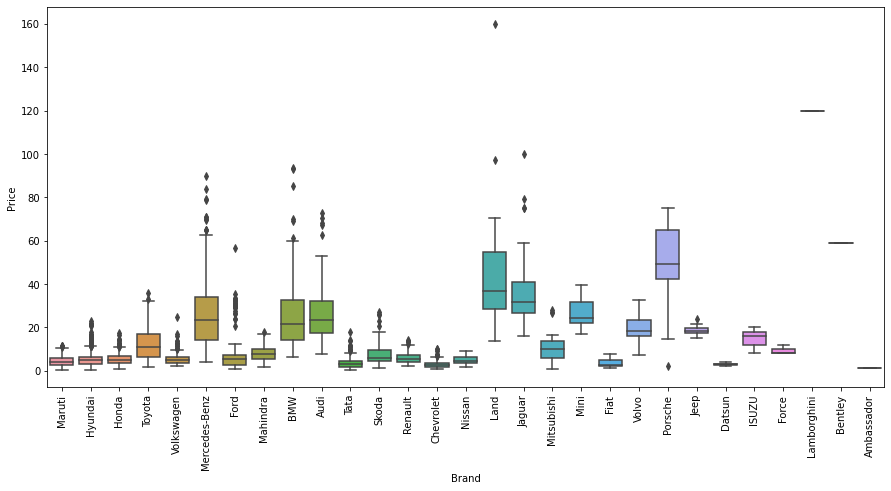

In [74]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
order = df_cars['Brand'].value_counts(ascending=False).index
sns.boxplot(x='Brand',y="Price" ,data=df_cars, order=order)

plt.show()

As it is visible, Maruti, Hyundai, Honda, Toyota are among the brands having the lowest average price for its models. We can also see brands 'Lamborghini' and 'Bentley' have the highest price for their cars.

Although the average price of Ambassador is almost the lowest, its demand is also among the lowest. 

In [75]:
df_cars[df_cars['Brand']=='Ambassador']

Brand Model_Type Fuel_Type Transmission Owner_Type Location  Age  \
1181  Ambassador      Sedan    Diesel       Manual      Third  Chennai   16   

      Kilometers_Driven  Mileage_Converted  Engine  Power  Seats  Price  
1181              80000               12.8    1489   35.5      5   1.35

On a closer look, we can see that there is only 1 entry for 'Ambassador' in our dataset. This is a car which was launched in 2003 and has travelled 80000 Km. It is also a Third owner vehicle, that fetched 1.35L

###### 5A) Model_Type breakdown

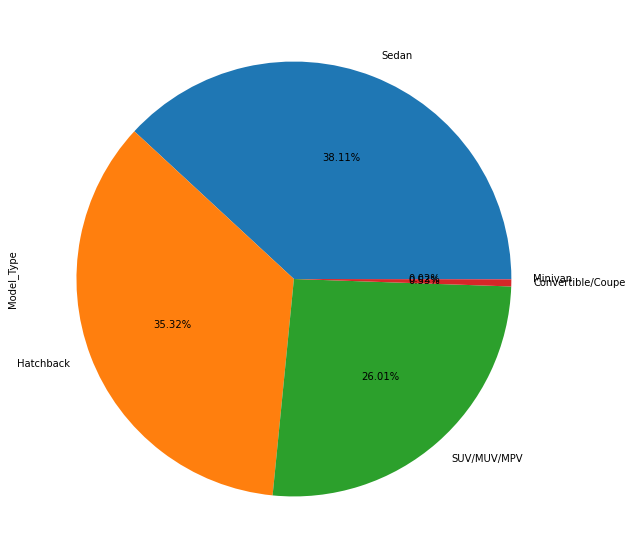

In [76]:
plt.figure(figsize=(15,10))
df_cars['Model_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

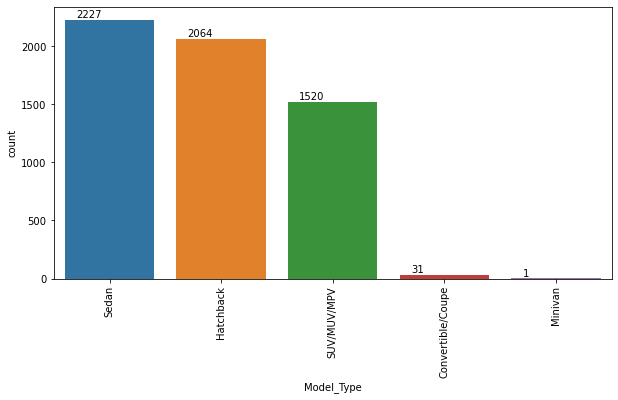

In [77]:
plt.figure(figsize=(10,5))

plt.xticks(rotation = 90)
order = df_cars['Model_Type'].value_counts(ascending=False).index
ax=sns.countplot(x='Model_Type', data=df_cars, order=order)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

plt.show()

From the above graphs, we can see that Sedans have the highest market share (38.11%) followed by Hatchback(35.32), SUV/MUV/MPV(26.03) and Convertible/Coupe(0.53%)

This would be due to the versatility of options, wider availability and a better, cheaper price range for Sedan and Hatchback models. 

Convertible/Coupe models are highly expensive, which might be why their sales number is lower compared to the other models.

###### 5B) Relationship between Model_Type and Price 

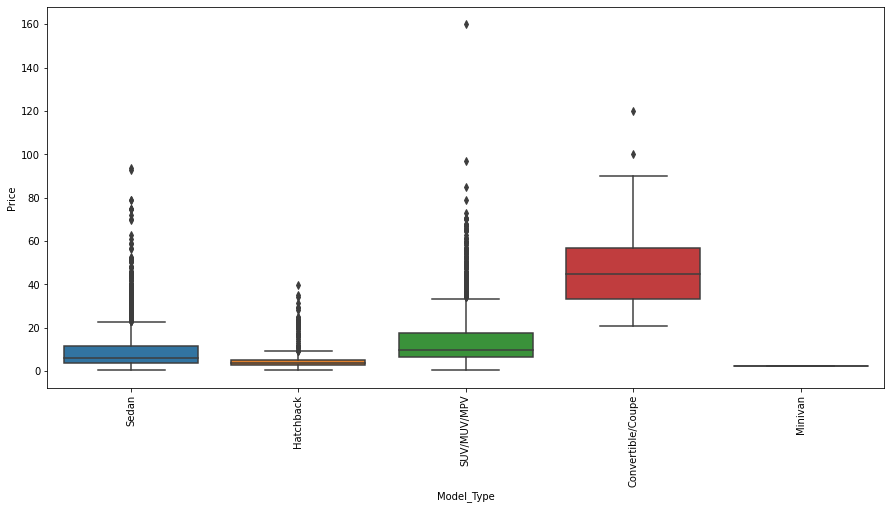

In [78]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
order = df_cars['Model_Type'].value_counts(ascending=False).index
sns.boxplot(x='Model_Type',y="Price" ,data=df_cars, order=order)

plt.show()

As explained above, Sedan and Hatchback have a cheaper price range than the other models, reflecting in their higher sales.

Convertible/Coupe has a significantly higher price range and hence lower sales number, compared to the other models.

###### 6A) Location breakdown

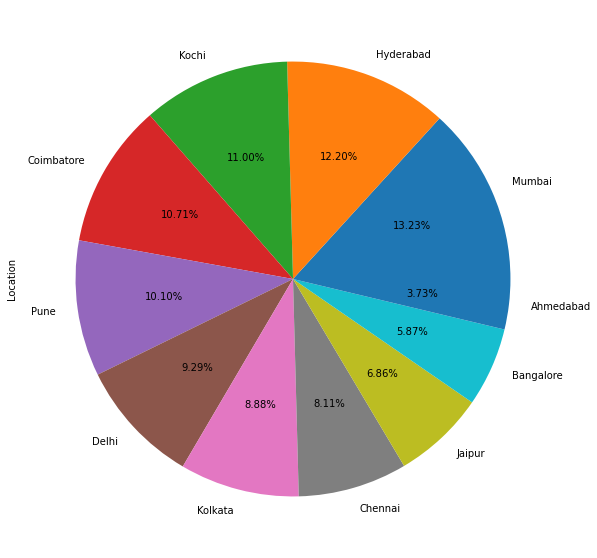

In [79]:
plt.figure(figsize=(15,10))
df_cars['Location'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

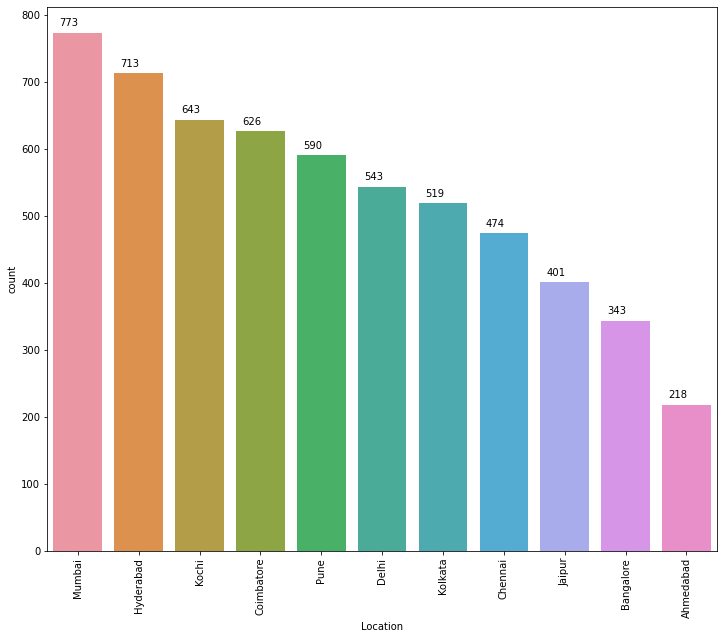

In [80]:
plt.figure(figsize=(12,10))

plt.xticks(rotation = 90)
order = df_cars['Location'].value_counts(ascending=False).index
ax=sns.countplot(x='Location', data=df_cars, order=order)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

plt.show()

Most of the pre-owned cars are sold in Mumbai followed by Hyderabad and Kochi. This can be attributed to more millenials, among others, residing in these cities, facing budget crunch and looking to get higher priced new cars at a lower price in the pre-owned cars market.This has elevated the scope of used car sale in the city

#### 6B) Relationship between Price and Location

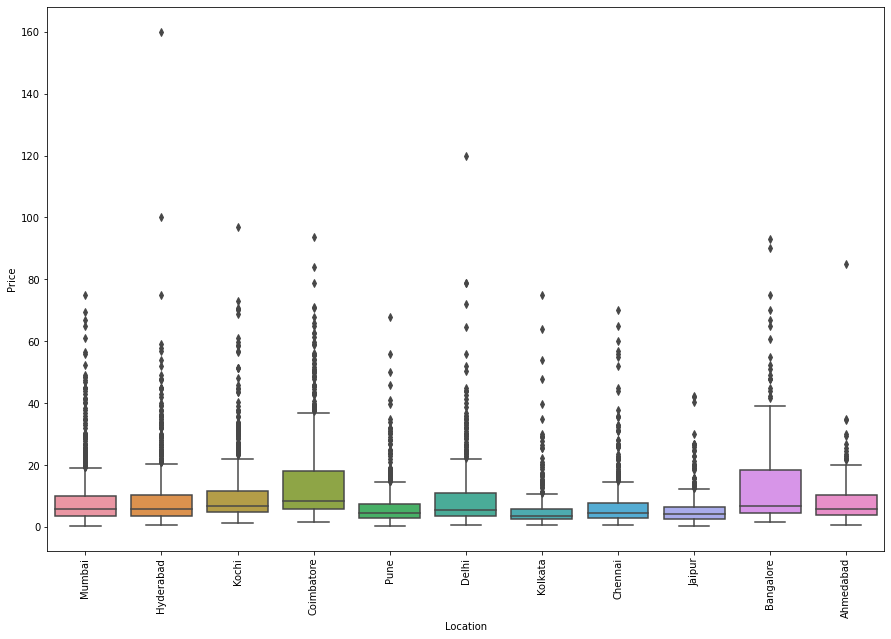

In [81]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
order = df_cars['Location'].value_counts(ascending=False).index
ax=sns.boxplot(x='Location',y="Price" ,data=df_cars, order=order)


plt.show()


Explained in the Relationship between Price, Location and Brand.

###### 7A) Age breakdown

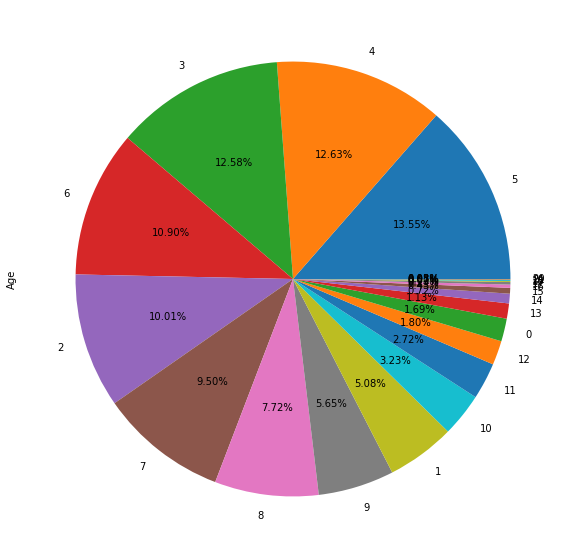

In [82]:
plt.figure(figsize=(15,10))
df_cars['Age'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

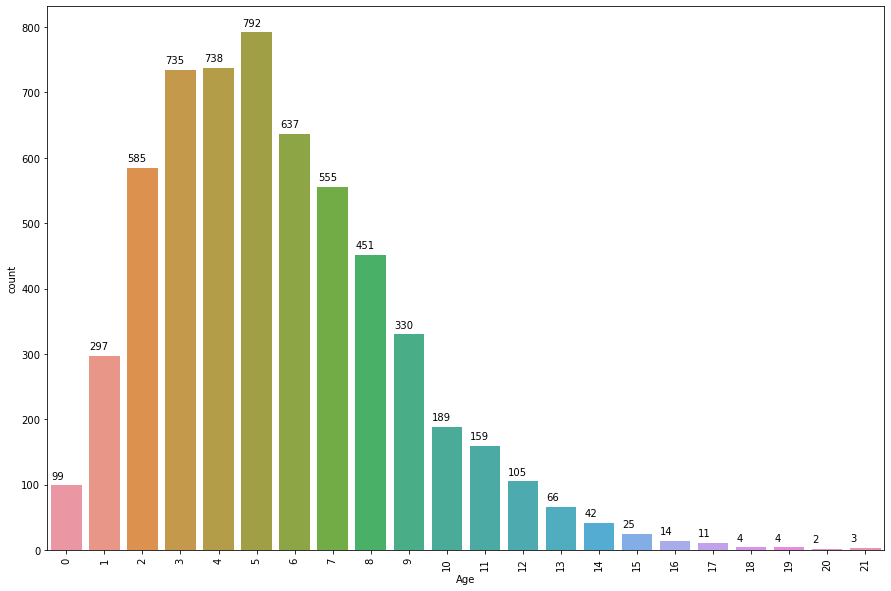

In [83]:
plt.figure(figsize=(15,10))

plt.xticks(rotation = 90)

ax=sns.countplot(x='Age', data=df_cars)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

plt.show()

Newer cars have a higher demand than older cars.

This would be due to the better technologies available in newer cars, that would be absent in older cars. Higher maintenance requirement would also reflect in a lower demand for older cars.

#### 7B) Relationship between Price and Age

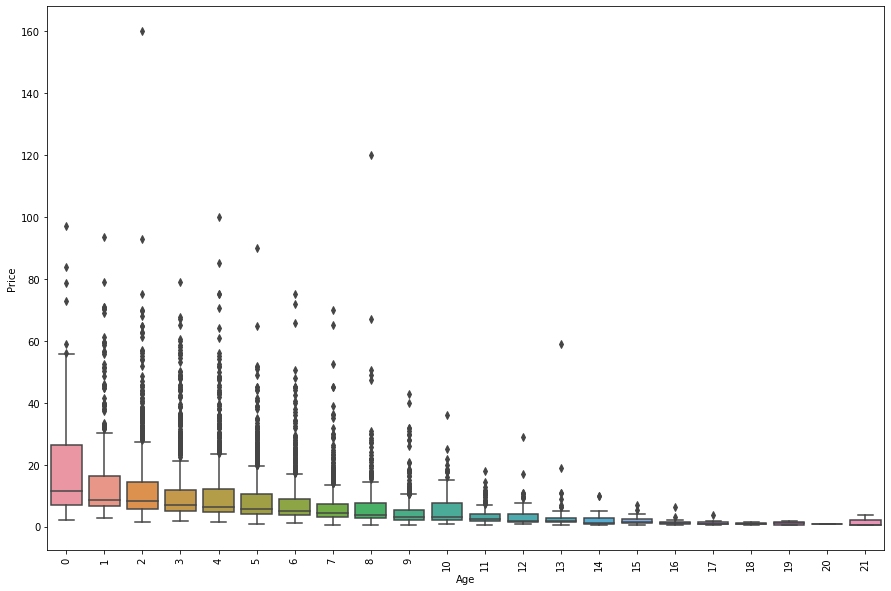

In [84]:
plt.figure(figsize=(15,10))

plt.xticks(rotation = 90)
sns.boxplot(x = 'Age', y = 'Price', data = df_cars)


plt.show()

We can see that, the price of cars is inversely proportional to the age of the car. Older the car, lower will be the price range and vice-versa. 

#### 8A) Fuel_Type Breakdown

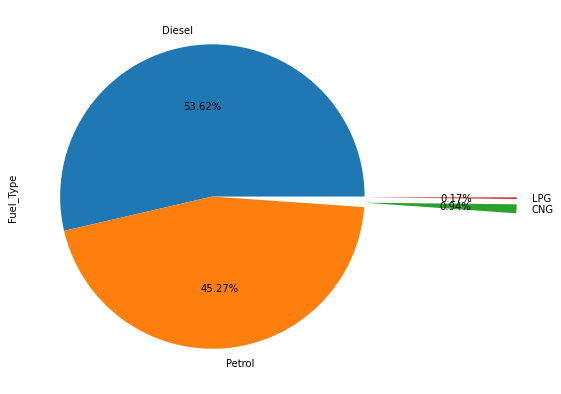

In [85]:
plt.figure(figsize=(15,7))
df_cars['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0,1,1])
plt.show()

We can see that, Diesel cars had the highest market share, followed by Petrol, CNG and LPG. This can be attributed to the performance and availability of cars belonging to each fuel type.

#### 8B) Relationship between Price and Fuel_Type

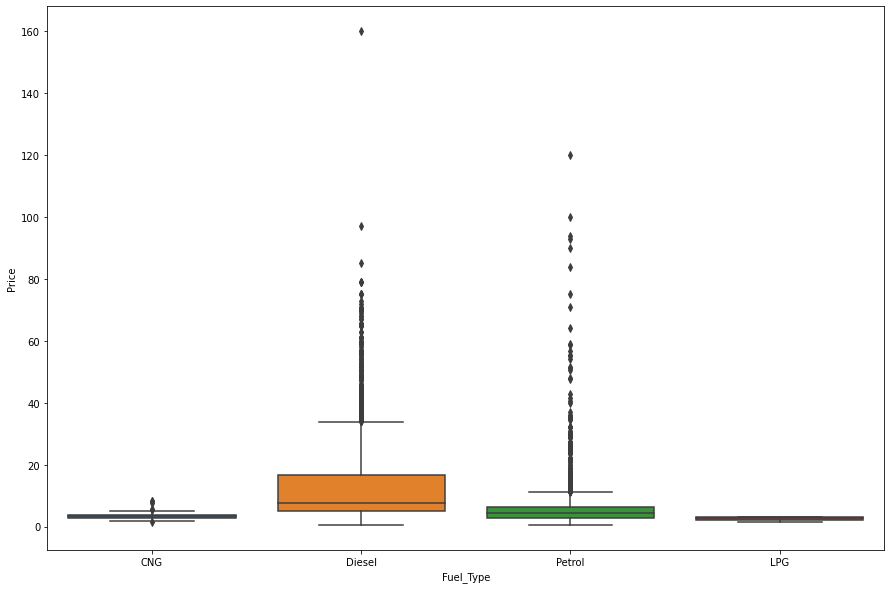

In [86]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df_cars)


plt.show()

Diesel cars are available in a wide range of prices, followed by petrol, CNG and LPG. This can be one of the main reason for their corresponding market share.

Also, Diesel cars are comparatively priced higher than the other fuel types.

#### 9A) Transmission Breakdown

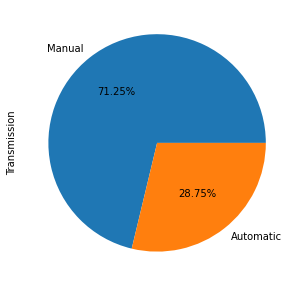

In [87]:
plt.figure(figsize=(10,5))
df_cars['Transmission'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Manual transmission cars have a higher price range than Automatic transmission cars.

This can be mainly due to the higher availability, higher variety of options and lower price in the Manual transmission group.

#### 9B) Relationship between Price and Transmission

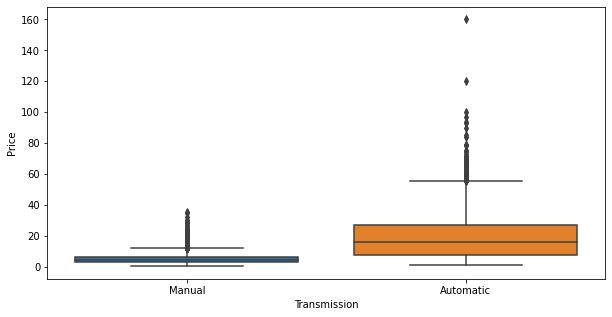

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Transmission', y = 'Price', data = df_cars)


plt.show()

As it was expected, Automatic transmission cars are mostly priced much higher than the Manual transmission cars. The cheaper price would be a decisive factor in people opting for Manual transmission cars. 

Also, since Automatic cars have more sensors, software calibrations and other components, there is a higher chance of these cars developing more problems (compared to manual transmission) over time. The maintenance of Automatic transmission cars would also be higher.

#### 10A). Owner_Type  Breakdown

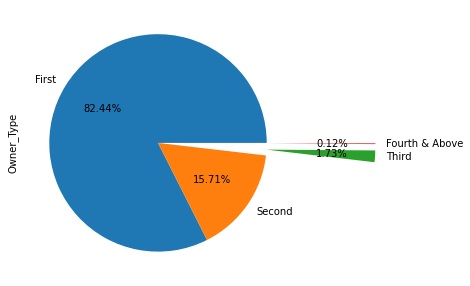

In [89]:
plt.figure(figsize=(15,5))
df_cars['Owner_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0,1,1])
plt.show()

First Owner cars have the highest market share, followed by Second, Third and those which have had Four or more owners.

In the case of machines, more the number of users, higher will be the chances of damage. Same is the case with cars. The usage patterns influence the life, mileage and performance of a car.

Even the gear shift patterns have an influence of the car. The usage patterns would be different for different people. Hence, when there are more owners for a car, each one having his/her own usage patterns, there is also a higher chance of the car being subjected to internal wear and tear, which would drastically affect its performance. This would also lead to higher maintenance requirements.

#### 10B) Relationship between Price and Owner_Type

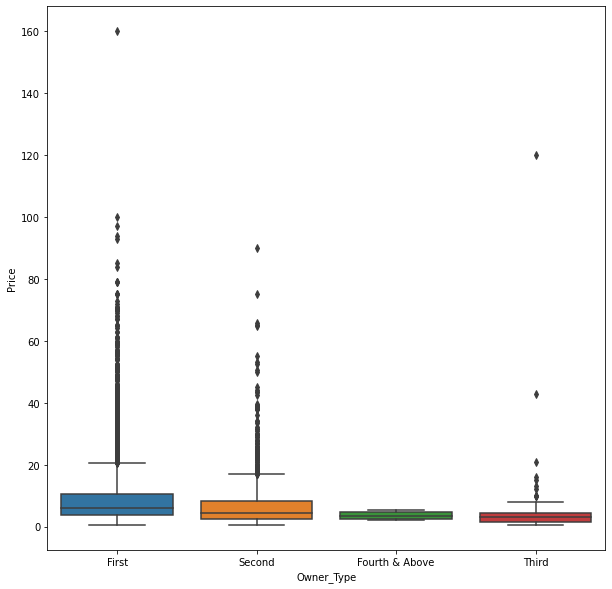

In [90]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Owner_Type', y = 'Price', data = df_cars)
plt.show()

As expected, overall, First owner cars are the costliest, followed by Second owner, Third owner and those cars which have had Four or more owners.

The reason is the same as that has been explained above.

#### 11) Relationship between Price and Kilometers_Driven

In [91]:
kmsize=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000,260000,280000,300000,320000,340000,360000,380000,400000,420000,440000,460000,480000,500000,520000,540000,560000,580000,600000,620000,640000,660000,680000,700000,720000,740000,760000,780000]
x=pd.cut(df_cars['Kilometers_Driven'],bins=kmsize,precision=2)
pd.crosstab(x, 'Price')


col_0              Price
Kilometers_Driven       
(0, 20000]           613
(20000, 40000]      1354
(40000, 60000]      1571
(60000, 80000]      1238
(80000, 100000]      589
(100000, 120000]     199
(120000, 140000]     130
(140000, 160000]      72
(160000, 180000]      34
(180000, 200000]      16
(200000, 220000]       6
(220000, 240000]       5
(240000, 260000]       6
(260000, 280000]       1
(280000, 300000]       3
(440000, 460000]       1
(460000, 480000]       2
(600000, 620000]       1
(700000, 720000]       1
(760000, 780000]       1

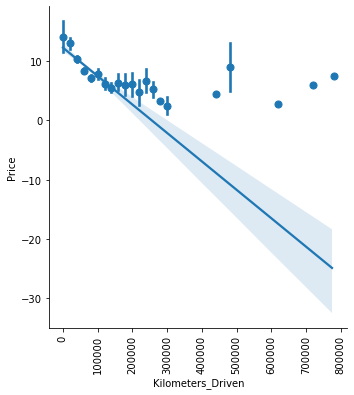

In [92]:
sns.lmplot(data=df_cars, x='Kilometers_Driven', y='Price',x_bins=kmsize,scatter=True)
plt.xticks(rotation = 90)
plt.show()

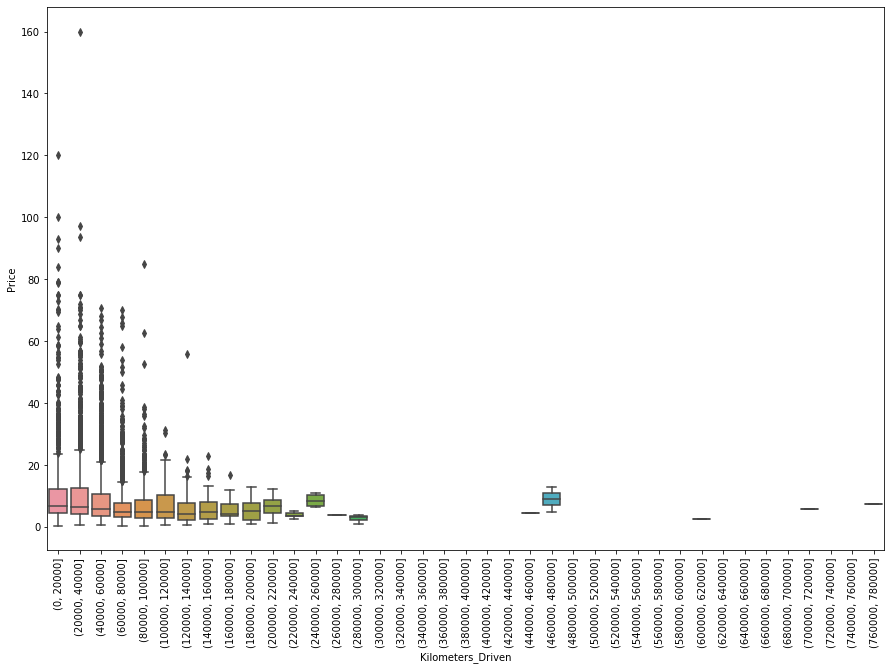

In [93]:
plt.figure(figsize=(15, 10))
x=pd.cut(df_cars['Kilometers_Driven'],kmsize,precision=2)
plt.xticks(rotation = 90)
sns.boxplot(x=x, y='Price', data=df_cars )
plt.show()



Cars that have travelled less than 20000 Kms have the highest price range, followed by those in the 20000 to 40000 Km range. 

Overall, cars that have travelled less than 60000 Kms have the highest price range. This group also has the highest number of cars  (3538 cars) which occupies over 60% of the market share.

As we can see, the Price is inversely proportional to Kilometers_Driven. As the cars travels more, there would be more wear and tear of internal components including engine, transmission units, etc. This would lead to a reduction in performance and increased maintenance. This would be the reason why the Price decreases as the car travels more Kilometers.

#### 12) Relationship between Price and Engine

In [94]:
x=pd.cut(df_cars['Engine'],[500,1000,1500,2000,2500,3000,4000,6000],precision=0)
pd.crosstab(x, 'Price')


col_0         Price
Engine             
(500, 1000]     578
(1000, 1500]   2929
(1500, 2000]   1167
(2000, 2500]    697
(2500, 3000]    416
(3000, 4000]     28
(4000, 6000]     28

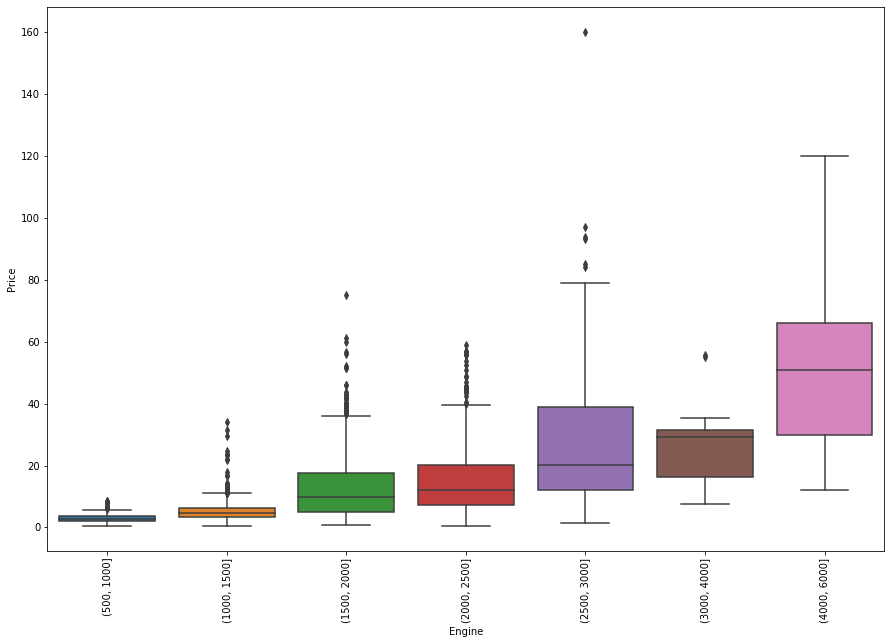

In [95]:
plt.figure(figsize=(15, 10))
x=pd.cut(df_cars['Engine'],[500,1000,1500,2000,2500,3000,4000,6000],precision=0)
plt.xticks(rotation = 90)
sns.boxplot(x=x, y='Price', data=df_cars )
plt.show()

We can see that the price of a car increases with increase in Engine capacity (CC). Cars having engine capacity less than 1000CC fall in the lowest price range. Cars having engine capacity greater than 4000 CC fall in the highest price range.

Cars above 4000CC are the ultra premium luxury cars offering the best performance. The components and technologies required, along with the high road taxes for such vehicles significantly drive up the on-road cost for a new unit of the same model. This has its direct impact even on the used car market.  

#### 13). Relationship between Price and Mileage_Converted

In [96]:
x=pd.cut(df_cars['Price'],bins=[0,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,50,160],precision=2)
pd.crosstab(x, 'Mileage_Converted')

col_0      Mileage_Converted
Price                       
(0, 1]                    76
(1, 2]                   305
(2, 3]                   690
(3, 4]                   789
(4, 5]                   673
(5, 6]                   622
(6, 7]                   476
(7, 8]                   344
(8, 9]                   244
(9, 10]                  177
(10, 12]                 242
(12, 14]                 180
(14, 16]                 115
(16, 18]                 139
(18, 20]                 101
(20, 25]                 189
(25, 50]                 392
(50, 160]                 89

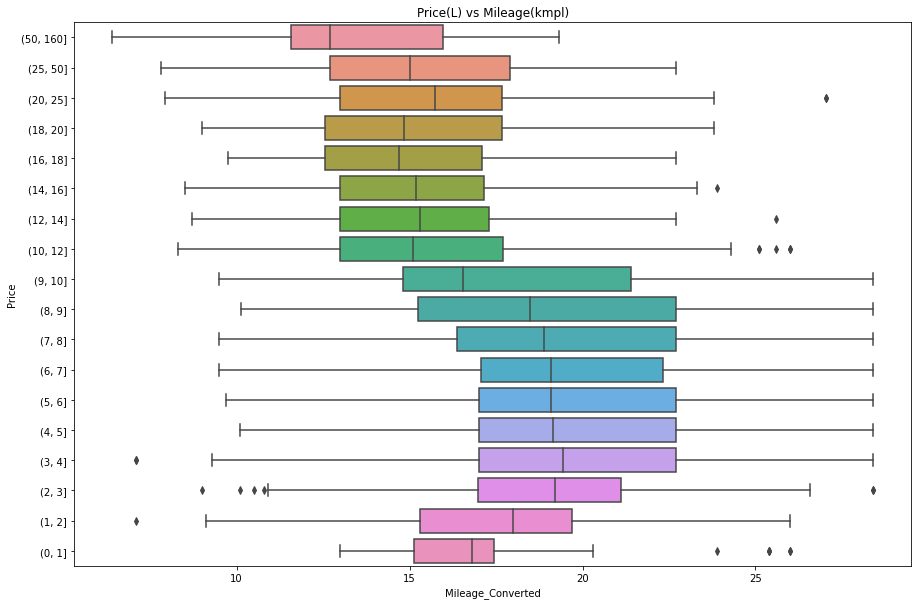

In [97]:
plt.figure(figsize=(15, 10))

x=pd.cut(df_cars['Price'],bins=[0,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,50,160],precision=2, ordered=True)
ordery = sorted(x.unique(), reverse=True)

sns.boxplot(x='Mileage_Converted',y=x, data=df_cars, order=ordery )
plt.title('Price(L) vs Mileage(kmpl)')
plt.show()


We can see that, for cars that are priced below 10L, mileage is an influencing factor for the car's price. However, the mileage of a car ceases to be of significant importance for the cars priced above 10L. For the cars priced above 10L, there would be several other, more significant factors such as power, engine capacity, performance, etc.

For the cars that are priced below 10L, higher mileage would result in higher price.

Upto 10L is the price range mostly prefered by the middle class population that gives significant weightage to the mileage of the car, considering the increasing fuel prices. We can also see that, the group of cars that are priced upto 10L has the highest market share (over 72%), which underlines its demand.

#### 14). Relationship between Price and Power

In [98]:
x=pd.cut(df_cars['Power'],bins=[0,50,100,150,200,250,300,600],precision=2)
pd.crosstab(x, 'Power')

col_0       Power
Power            
(0, 50]       161
(50, 100]    3006
(100, 150]   1501
(150, 200]    832
(200, 250]    188
(250, 300]    101
(300, 600]     54

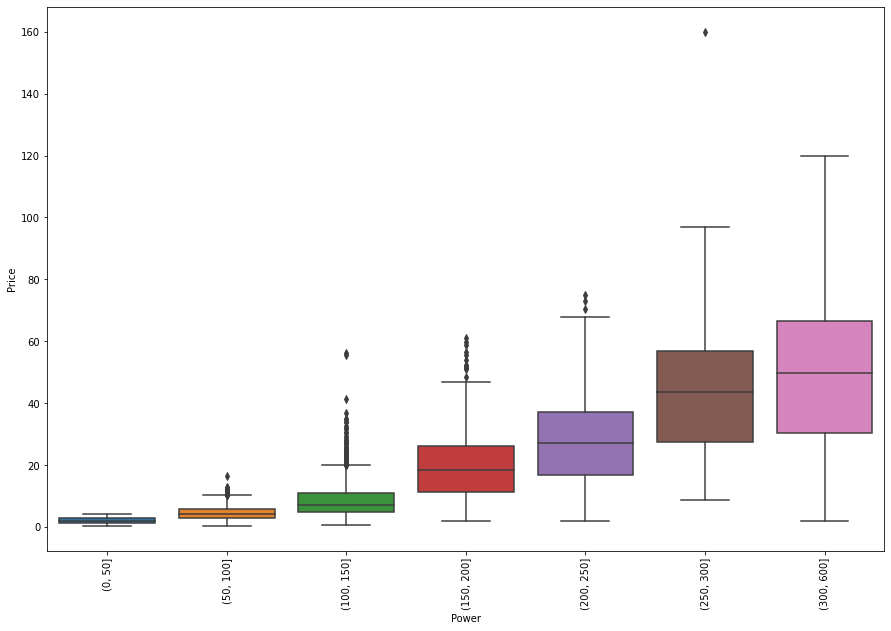

In [99]:
plt.figure(figsize=(15, 10))
x=pd.cut(df_cars['Power'],[0,50,100,150,200,250,300,600],precision=0)
plt.xticks(rotation = 90)
sns.boxplot(x=x, y='Price', data=df_cars )
plt.show()

It is clearly seen that the price of a car increases with the increase in power provided by it. 

Cars having power above 300 bhp are the ultra premium luxury cars offering the best performance. The components and technologies required for such vehicles, significantly drive up the on-road cost for a new unit of the same model. This has its direct impact even on the used car market.  

#### 15). Relationship between Price and Brand,Model_Type

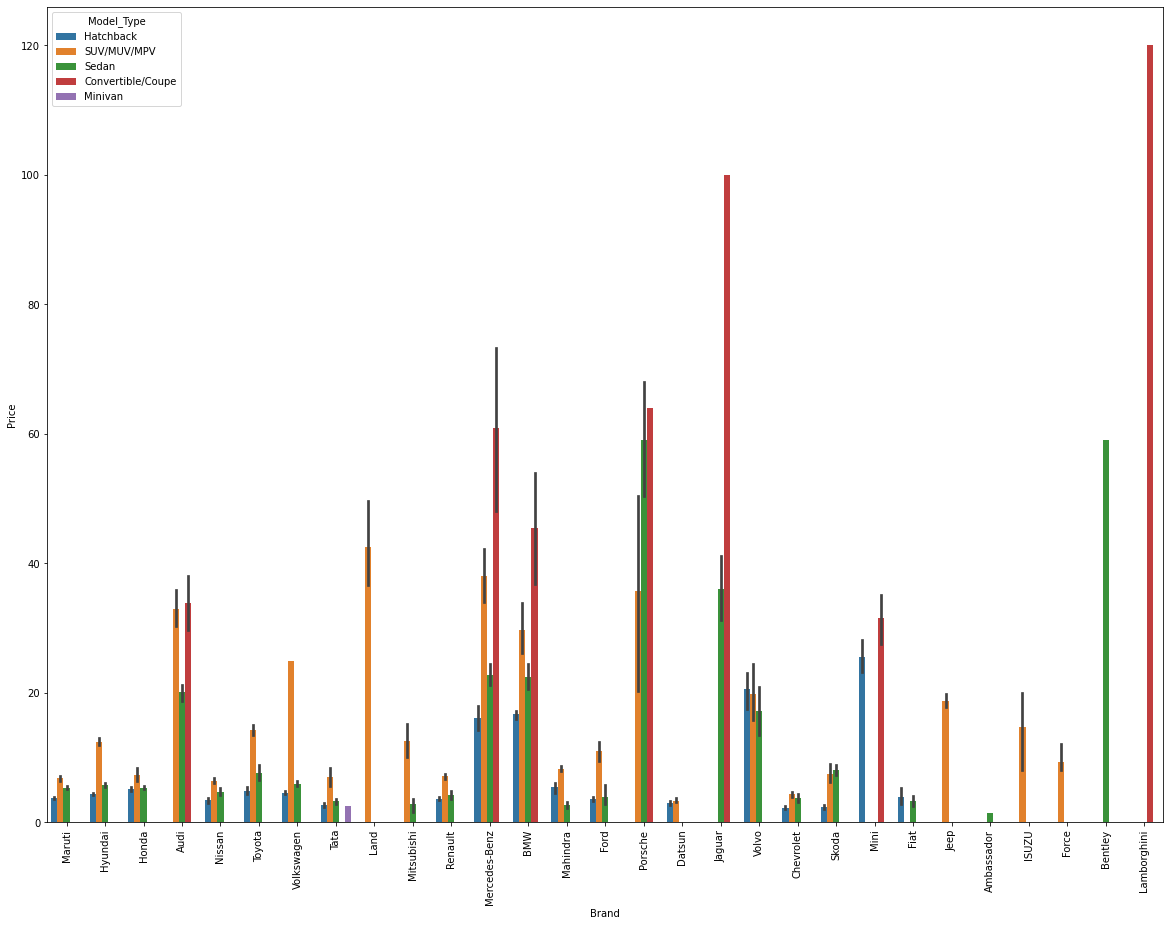

In [100]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Brand', y='Price', data=df_cars, hue='Model_Type')
plt.xticks(rotation = 90)
plt.show()

For premium brands like Audi, Mercedes-Benz,BMW,Porshe,Jaguar, Mini and Lamborghini that sell Convertible/Coupe models, these high end, sporty, luxurious cars have the highest price.

Across all the other brands,other than the Convertible/Coupe models, SUV/MUV/MPV models are the most expensive, except a few exceptions,  followed by Sedan models, with Hatchback models being the cheapest.

#### 16). Relationship between Price and Brand,Owner_Type

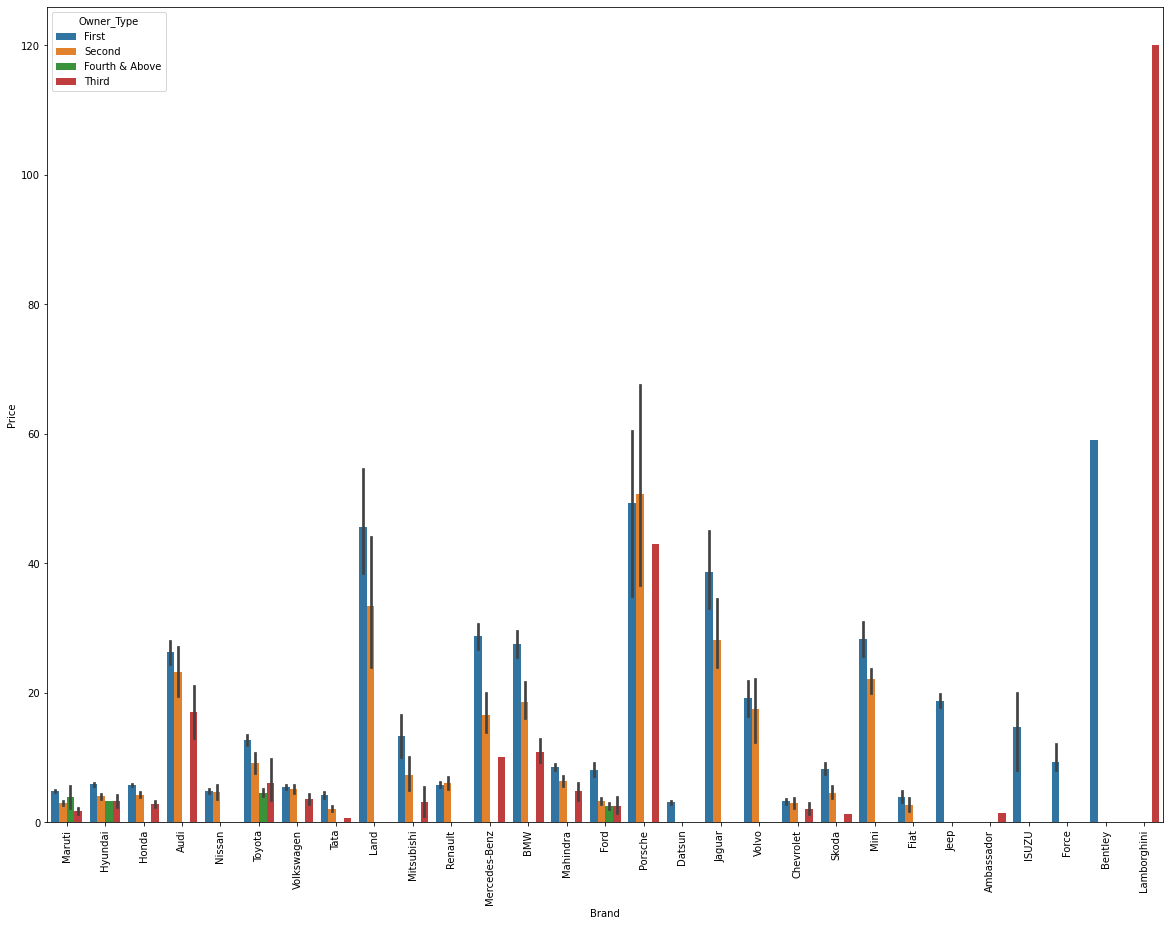

In [101]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Brand', y='Price', data=df_cars, hue='Owner_Type')
plt.xticks(rotation = 90)
plt.show()

Based on data and barplot we can interpret that across the various brands, the price tends to fall as the number of owners increase, except for a few anomalies.

For premium brands like Audi, Land Rover, Mercedes-Benz,BmW, Porshe, Jaguar, Volvo, Mini Cooper, Jeep, Bentley and Lamborghini, even multi owner cars fetch a reasonably higher price than the other brands.

#### 17). Relationship between Price and Brand,Transmission

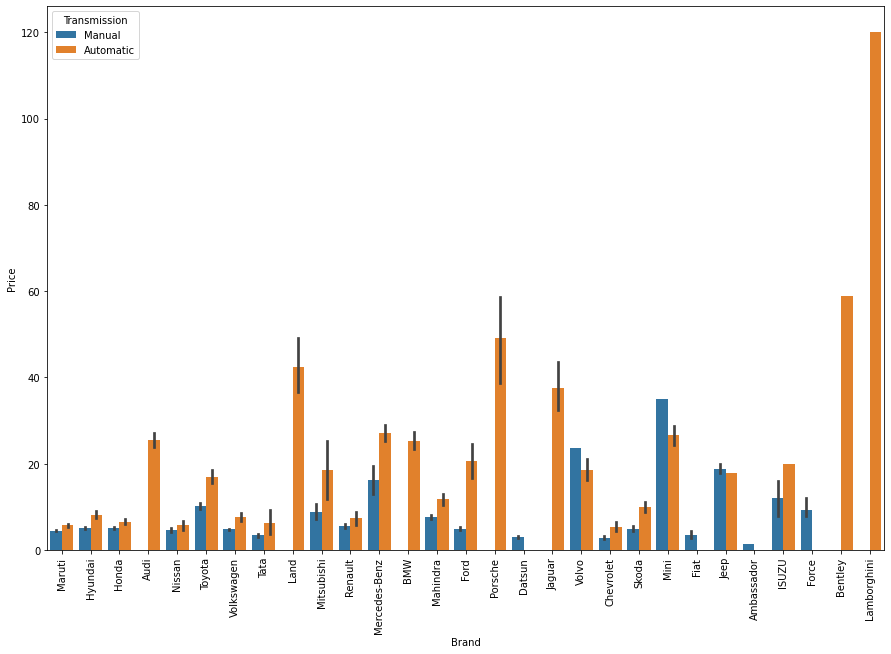

In [102]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Brand', y='Price', data=df_cars, hue='Transmission')
plt.xticks(rotation = 90)
plt.show()

As it has been previous explained, even across the brands, Automatic transmission models fetch a higer price than Manual transmission.

We can also see the absence of Manual transmission for premium brands like Audi, Land Rover, BMW,Porshe, Jaguar,Bentley and Lamborghini.

Some low cost brands like Datsun, Fiat, Ambassador and Force lack the Automatic Transmission option

#### 18). Relationship between Price and Brand,Location

In [103]:
l1=['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad']
x1=df_cars[df_cars['Location'].isin(l1)]
l2=['Jaipur','Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']
x2=df_cars[df_cars['Location'].isin(l2)]

In [104]:
pd.crosstab(x1['Brand'], x1['Location'], x1['Price'], aggfunc=(len,np.median))

len                                     median             \
Location      Chennai Coimbatore Hyderabad Mumbai   Pune Chennai Coimbatore   
Brand                                                                         
Ambassador        1.0        NaN       NaN    NaN    NaN   1.350        NaN   
Audi              9.0       50.0      29.0   25.0    8.0  23.750     30.955   
BMW              26.0       33.0      33.0   49.0   25.0  19.375     29.400   
Bentley           NaN        NaN       1.0    NaN    NaN     NaN        NaN   
Chevrolet        13.0       11.0      10.0   12.0   18.0   2.100      3.700   
Datsun            1.0        1.0       1.0    NaN    2.0   2.750      3.310   
Fiat              2.0        4.0       2.0    2.0    3.0   2.375      5.995   
Force             1.0        NaN       NaN    NaN    NaN  12.000        NaN   
Ford             45.0       32.0      55.0   34.0   24.0   2.900      7.315   
Honda            35.0       41.0      47.0  108.0   61.0   4.700      6.330   
Hyundai          71.0      133.0     100.0  110.0   95.0   4.000      6.930   
ISUZU             NaN        1.0       NaN    NaN    NaN     NaN     16.090   
Jaguar            1.0        7.0       8.0    5.0    2.0  26.500     32.800   
Jeep              NaN        3.0       1.0    3.0    1.0     NaN     21.690   
Land              1.0       10.0       7.0    4.0    3.0  16.500     54.765   
Mahindra         22.0       38.0      27.0   29.0   19.0   4.675      9.875   
Maruti           93.0       93.0     169.0  141.0  146.0   4.250      6.060   
Mercedes-Benz    21.0       45.0      28.0   52.0   24.0  20.000     38.150   
Mini              1.0        1.0       3.0    7.0    2.0  22.000     19.410   
Mitsubishi        5.0        2.0       3.0    3.0    3.0   3.850     21.765   
Nissan           13.0        5.0      14.0   15.0   10.0   3.500      5.850   
Porsche           NaN        3.0       1.0    3.0    NaN     NaN     45.820   
Renault           6.0       14.0      16.0   19.0   17.0   6.000      7.845   
Skoda             6.0       12.0      28.0   40.0   17.0   5.325      9.705   
Tata             21.0       22.0      28.0   11.0   34.0   2.500      3.570   
Toyota           40.0       37.0      57.0   49.0   40.0   9.850     12.360   
Volkswagen       38.0       27.0      39.0   51.0   34.0   4.850      6.430   
Volvo             2.0        1.0       6.0    1.0    2.0   9.625     24.360   

                                         
Location      Hyderabad  Mumbai    Pune  
Brand                                    
Ambassador          NaN     NaN     NaN  
Audi             25.000  22.000  18.500  
BMW              20.990  19.900  15.500  
Bentley          59.000     NaN     NaN  
Chevrolet         2.600   2.550   2.250  
Datsun            2.990     NaN   3.525  
Fiat              4.550   4.325   3.300  
Force               NaN     NaN     NaN  
Ford              5.100   6.375   3.100  
Honda             6.300   4.875   4.450  
Hyundai           3.995   4.850   4.000  
ISUZU               NaN     NaN     NaN  
Jaguar           41.500  34.500  27.500  
Jeep             16.900  17.750  18.500  
Land             40.000  30.375  23.000  
Mahindra          7.900   7.900   6.500  
Maruti            4.000   3.940   3.325  
Mercedes-Benz    22.250  15.300  18.000  
Mini             23.500  25.000  26.000  
Mitsubishi        7.990   5.450   9.950  
Nissan            5.400   5.550   3.875  
Porsche          45.000  32.000     NaN  
Renault           5.470   5.500   6.000  
Skoda             6.495   6.200   3.760  
Tata              2.950   3.950   2.500  
Toyota           12.500  10.400  10.175  
Volkswagen        5.700   4.750   4.290  
Volvo            22.750  17.650  14.900

In [105]:
pd.crosstab(x2['Brand'], x2['Location'], x2['Price'], aggfunc=(len,np.median))

len                                           median  \
Location      Ahmedabad Bangalore  Delhi Jaipur  Kochi Kolkata Ahmedabad   
Brand                                                                      
Audi               10.0      32.0   27.0    4.0   25.0    15.0    12.000   
BMW                15.0      22.0   16.0    5.0   25.0    12.0    18.500   
Chevrolet           2.0       7.0    3.0   10.0   16.0    18.0     3.525   
Datsun              NaN       2.0    NaN    NaN    2.0     4.0       NaN   
Fiat                NaN       NaN    1.0    4.0    1.0     4.0       NaN   
Force               NaN       NaN    NaN    NaN    NaN     2.0       NaN   
Ford                3.0      16.0   17.0   17.0   29.0    22.0     3.500   
Honda              26.0      26.0   65.0   38.0   81.0    72.0     4.825   
Hyundai            46.0      77.0   88.0   84.0  136.0   111.0     4.900   
ISUZU               NaN       NaN    NaN    2.0    NaN     NaN       NaN   
Jaguar              NaN       3.0    5.0    NaN    6.0     3.0       NaN   
Jeep                NaN       NaN    NaN    2.0    3.0     2.0       NaN   
Lamborghini         NaN       NaN    1.0    NaN    NaN     NaN       NaN   
Land                2.0       4.0   12.0    NaN    8.0     NaN    20.500   
Mahindra           10.0      19.0   32.0   17.0   34.0    21.0     9.500   
Maruti             50.0      28.0  112.0  114.0  117.0   112.0     4.250   
Mercedes-Benz       3.0      32.0   34.0   12.0   37.0    16.0    25.510   
Mini                1.0       2.0    1.0    1.0    6.0     1.0    22.000   
Mitsubishi          NaN       4.0    3.0    1.0    2.0     1.0       NaN   
Nissan              2.0       1.0    3.0    7.0    8.0    11.0     4.075   
Porsche             NaN       1.0    2.0    NaN    4.0     2.0       NaN   
Renault             4.0      13.0   12.0   18.0   20.0     6.0     4.750   
Skoda               6.0       9.0   18.0    9.0   14.0    11.0     7.000   
Tata                9.0       8.0    7.0   21.0   10.0    12.0     2.900   
Toyota             18.0      19.0   65.0   17.0   30.0    22.0    11.180   
Volkswagen          9.0      16.0   18.0   18.0   25.0    39.0     4.700   
Volvo               2.0       2.0    1.0    NaN    4.0     NaN    16.000   

                                                          
Location      Bangalore    Delhi  Jaipur   Kochi Kolkata  
Brand                                                     
Audi             24.750   15.000  15.250  21.950  11.500  
BMW              28.000   20.130  24.750  30.290  13.500  
Chevrolet         2.650    1.950   1.500   3.255   2.185  
Datsun            2.880      NaN     NaN   3.540   2.600  
Fiat                NaN    1.650   2.350   5.850   2.095  
Force               NaN      NaN     NaN     NaN   8.000  
Ford              4.875    5.500   2.510   6.700   4.850  
Honda             5.225    3.800   4.350   6.220   3.500  
Hyundai           5.500    4.700   4.000   5.785   3.450  
ISUZU               NaN      NaN  14.000     NaN     NaN  
Jaguar           27.950   40.000     NaN  31.170  20.500  
Jeep                NaN      NaN  19.500  17.550  16.250  
Lamborghini         NaN  120.000     NaN     NaN     NaN  
Land             66.000   35.000     NaN  44.795     NaN  
Mahindra          7.400    7.925   7.200   8.675   7.000  
Maruti            4.375    4.225   3.750   5.530   3.500  
Mercedes-Benz    23.500   21.630  22.750  23.680  21.745  
Mini             27.000   22.000  23.000  30.250  39.750  
Mitsubishi       10.870   11.000  11.850  11.850  14.700  
Nissan            6.500    3.500   3.500   5.825   2.650  
Porsche          75.000   61.250     NaN  49.870  69.500  
Renault           7.750    5.050   4.225   5.100   4.495  
Skoda             6.200    6.225   4.250   8.305   4.250  
Tata              4.475    3.500   2.500   4.825   2.875  
Toyota           16.000   10.850  11.750  13.810   6.150  
Volkswagen        5.250    3.675   4.955   5.540   3.150  
Volvo            21.000   16

In [106]:
yprop = 'Price'
xprop = 'Location'
h= 'Brand'
px.bar(df_cars, x=xprop, y=yprop, color=h)

As it can be infered from the tabulated data as well as from the interactive graph, Coimbatore, Mumbai, Hyderbad and Kochi have the highest representation of brands. Due to the higher availability of options, sales are higher in these cities.

Also, due to the large presence of high priced premium models in Coimbatore, Mumbai, Hyderbad, Kochi, Bangalore,Pune and Delhi, the price spread in these cities is higher. 

#### 19). Relationship between Price and Location, Fuel_Type

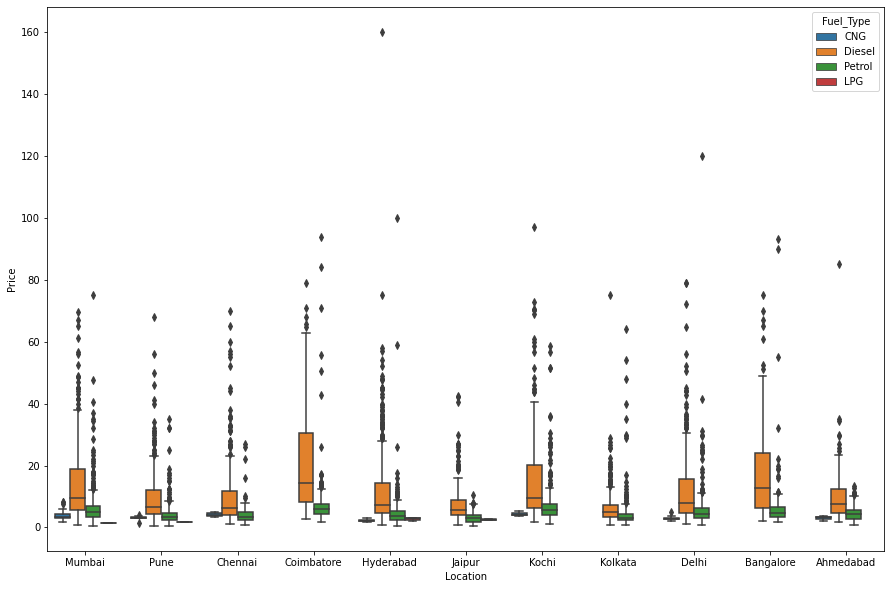

In [107]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Location', y='Price', data=df_cars, hue='Fuel_Type')
plt.show()

From the graph, we can see that, across all the cities, Diesel fuel cars are the costliest, followed by the Petrol cars.

This would be due to the higher performance and better mileage of Diesel run vehicles over the other fuel types. Since, the price of fuel only has a minor variation across India, the location does not influence the price of a car for a certain fuel type

#### 20). Relationship between Price and Age, Location

In [108]:
yprop = 'Price'
xprop = 'Location'
h= 'Age'
px.scatter(df_cars, x=xprop, y=yprop, color=h, template="simple_white")

From the above scatterplot, we can infer that, irrespective of the location, overall, newer models fetch a higher price than older models (keeping all the other influencing factors constant)

#### 21). Relationship between Price and Age, Transmission

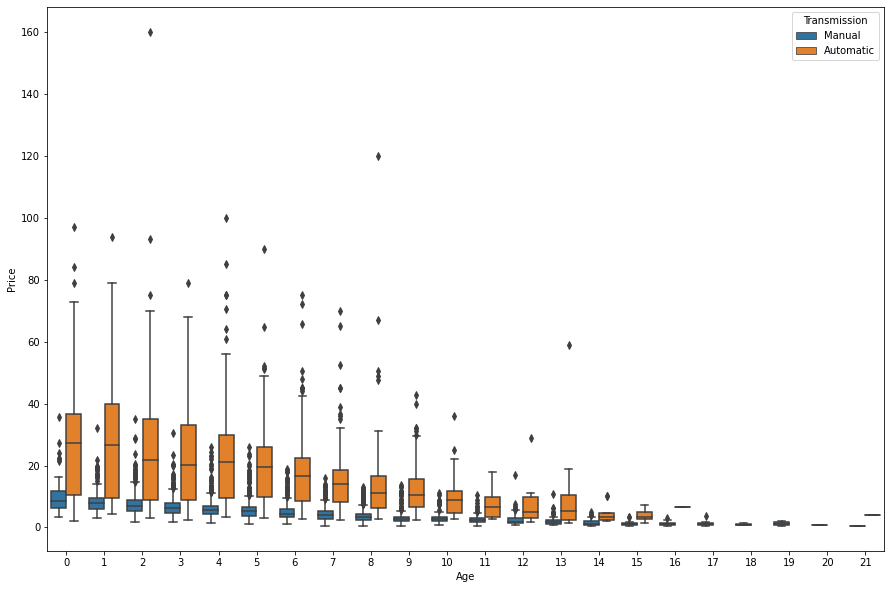

In [109]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Age', y='Price', data=df_cars, hue='Transmission')
plt.show()

From the above graph, we infer that price of the car falls as the age of the car increases.

Also, we infer that, irrespective of the age of the car, the automatic transmission cars are priced higher compared to the manual transmission cars.

#### 22). Relationship between Price and Power, Age

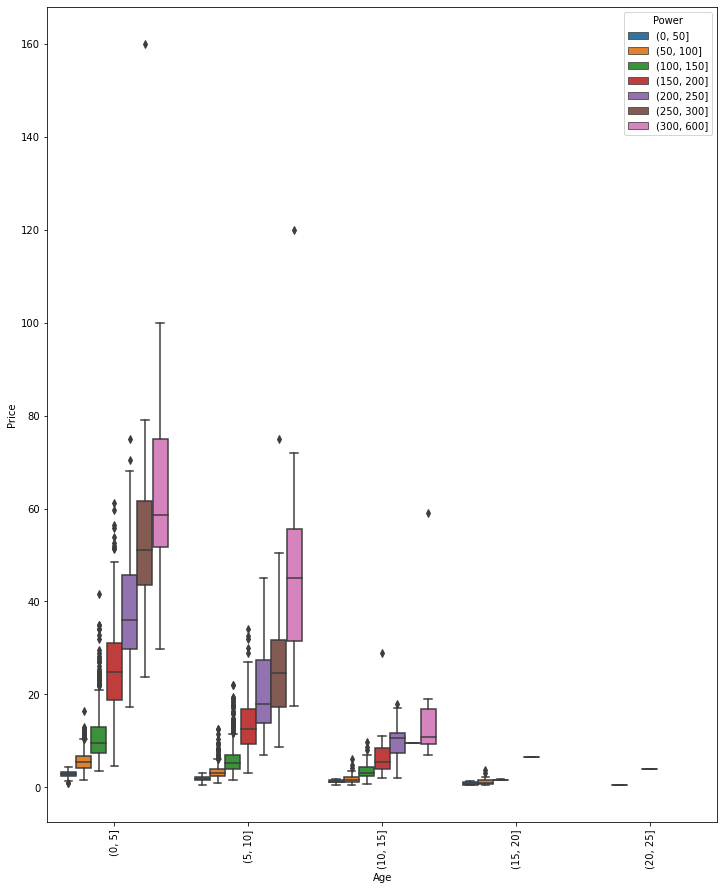

In [110]:
plt.figure(figsize=(12, 15))
x=pd.cut(df_cars['Power'],[0,50,100,150,200,250,300,600],precision=0)
y=pd.cut(df_cars['Age'],[0,5,10,15,20,25],precision=0)
plt.xticks(rotation = 90)
sns.boxplot(x=y, y='Price', hue= x, data=df_cars )
plt.show()

We can see that, across the years, the price of a car increases with increase in its power and decrease in its age.

For a car having similar power values, the car is worth the most for a recently launched car and the least for an old one. This would mean that, you could buy a powerful car at a cheaper price if you opt for an older model. This price would be significantly lower than what would be required to buy a recent model having a similar power value.

Over the years, the car undergoes wear and tear, which would impact the performance of its engine and allied components. This would have a drastic impact on the actual power output, whhich can be somewhat lower than the prescribed value.

#### 23). Relationship between Price and Kilometers_Driven, Age

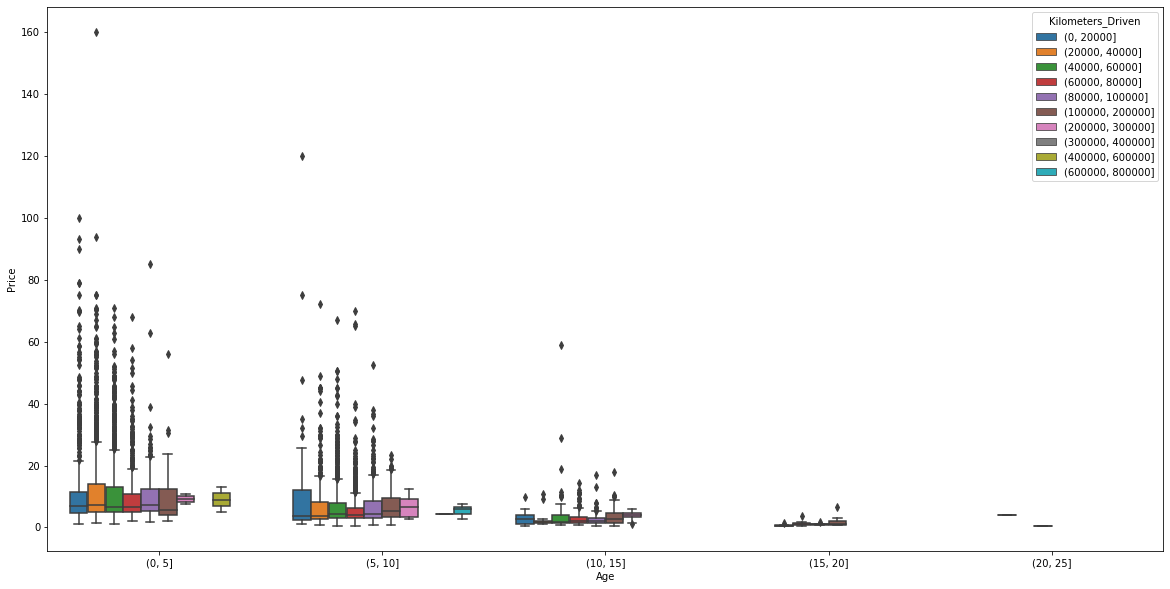

In [111]:
plt.figure(figsize=(20, 10))
x=pd.cut(df_cars['Age'],[0,5,10,15,20,25],precision=0)
km=[0,20000,40000,60000,80000,100000,200000,300000,400000,600000,800000]
y=pd.cut(df_cars['Kilometers_Driven'],bins=km,precision=2)


sns.boxplot(x=x, y='Price', hue= y, data=df_cars )
plt.show()

We have seen, the price is higher if the distance covered is lower. 

Although for newer models, the amount of Kilometeres covered would have not much impact on the price, the impact is very much significant for older models. 

For fairly older models, the cars that havve travelled comparatively very less kilometeres than the other vehicles in the group, would fetch a higher price than the others in the same age group(year). As the car ages, it would naturally undergo some deterioration. The added kilometers would further cause more wear and tear. Also, for older models, there will be an absence of many of the technologies available in recent models.

#### 24). Relationship between Price and Fuel_Type, Transmission

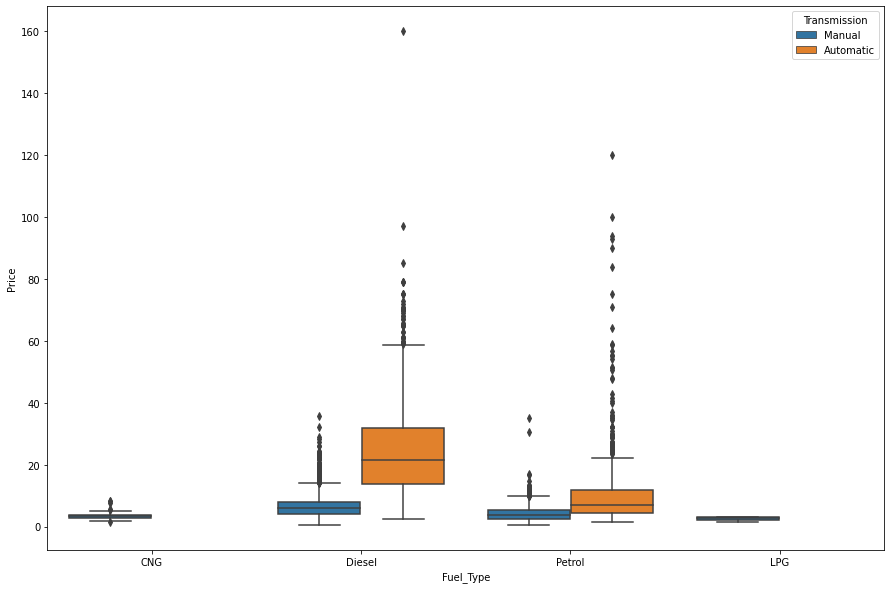

In [112]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Fuel_Type', y='Price', data=df_cars, hue='Transmission')
plt.show()

The price of Diesel cars are significantly higher than the other fuel types.

Also, among the diesel variants, cars having automatic transmission have a higher price than the cars having manual transmission. Same is the case, even for Petrol run cars.

CNG and LPG cars have only manual transmission and are priced significantly cheaper.



#### 25). Relationship between Price and Fuel_Type, Mileage

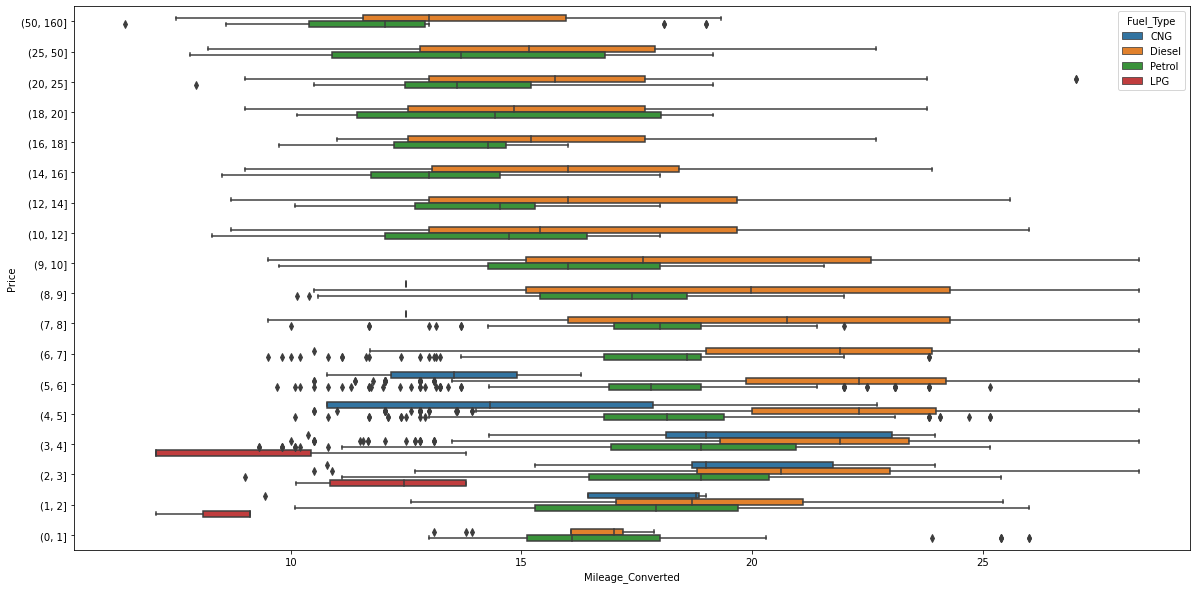

In [113]:
plt.figure(figsize=(20, 10))

x=pd.cut(df_cars['Price'],bins=[0,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,50,160],precision=2, ordered=True)
ordery = sorted(x.unique(), reverse=True)

sns.boxplot(x='Mileage_Converted',y=x,hue='Fuel_Type' , data=df_cars, order=ordery )
plt.show()

From this we can infer that, across the entire price range, except for cars costing less than 1L, Diesel run cars have a superior high mileage range than the other fuel types. This can also be one of the reasons why Diesel run cars are the most expensive ones. For cars costing less than 1L, Petrol run cars have the highest mileage range.

We can also see the absense of fuel sources such as CNG and LPG in cars valued more than 6L. 

#### 26). Relationship between Price and Owner_Type, Transmission

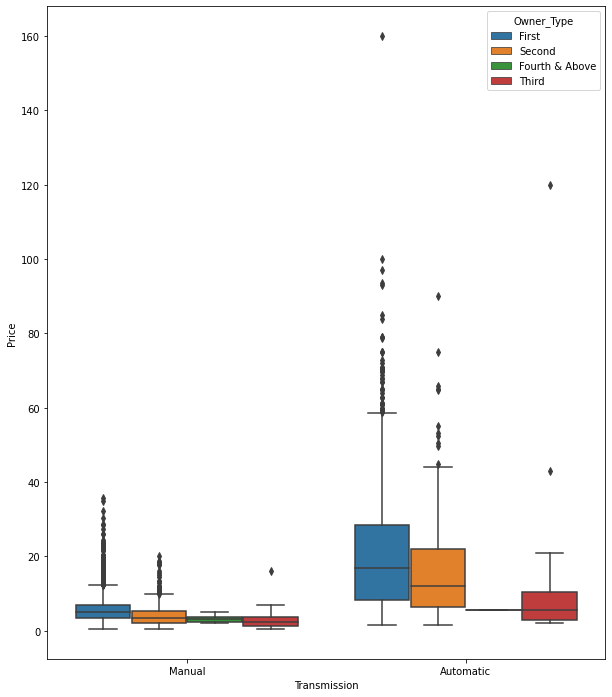

In [114]:
plt.figure(figsize=(10, 12))
sns.boxplot(x='Transmission', y='Price', data=df_cars, hue='Owner_Type')
plt.show()

We can see that Automatic transmission cars are priced significantly higher than the Manual transmission cars. Also, we can see that, the price of a car goes down as the number of previous owners increase. 

Each user has a certain driving pattern. For a new car, the internal car mechanisms get aligned with the user's usage patterns. As the number of users increase, the different usage patterns would lead to wear and tear. Although these can be minor, its impact increases significantly over time. 

This impact of the usage patterns is significantly higher on the Manual transmission cars, as the gear shift, clutch adjustments, etc are done manually. The cluct adjustment and the gear shift have to be done in perfect sync, which would otherwise result in wear and tear of the transmission unit. When the number of users increase, there is a higher chance for a higher wear and tear of the components. All of these would result in lower actual performance, mileage and higher maintenance.

#### 27). Relationship between Price and Mileage_Converted, Transmission

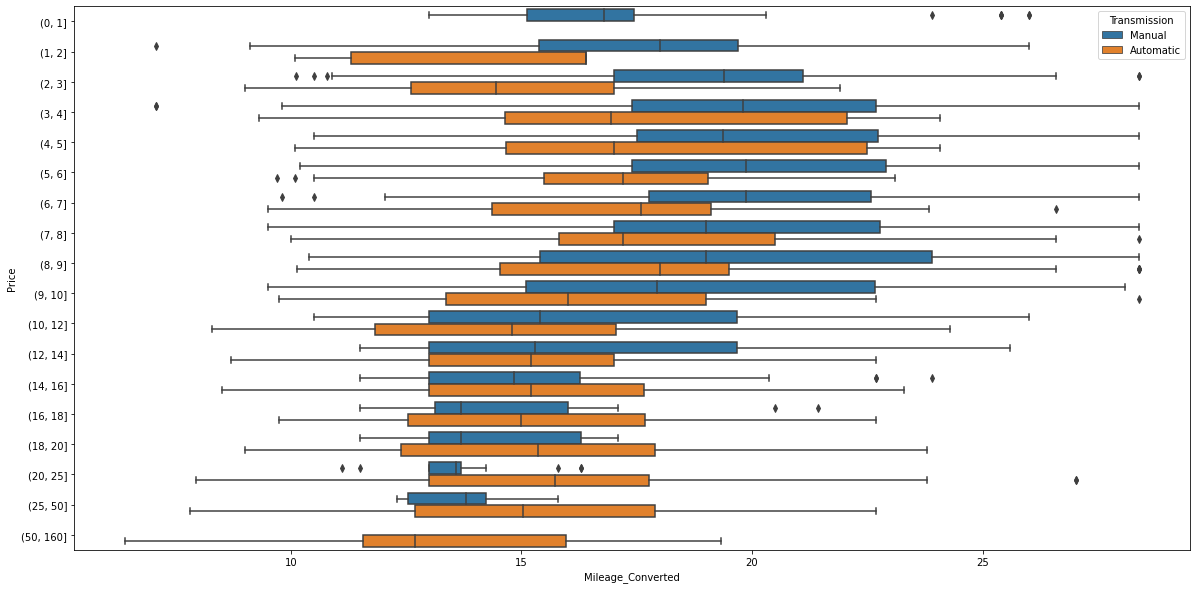

In [115]:
plt.figure(figsize=(20, 10))

x=pd.cut(df_cars['Price'],bins=[0,1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,50,160],precision=2, ordered=True)
ordery = sorted(x.unique(), reverse=True)

sns.boxplot(x='Mileage_Converted',y=x,hue='Transmission' , data=df_cars )
plt.show()

We have already seen that, for cars that are priced below 10L, mileage is an influencing factor for the car's price. However, the mileage of a car ceases to be of significant importance for the cars priced above 10L. For the cars priced above 10L, there would be several other, more significant factors such as power, engine capacity, performance, etc.

From this graph, we can infer that, for lower and medium priced cars (cars in the price range of 0-14L), Manual transmission models have a higher mileage than Automatic transmission models. 

However, for the premium priced cars(cars priced above 14L), Automatic transmission cars have a significantly higher mileage than the Manual transmission models.

This would be due to the difference in technologies used in the Automatic transmission models sold above 14L. Higher priced Automatic transmission cars would have state-of-the-art sensors and associated systoms which would efficiently handle the transmission unit without compromising much on the performance. However, several aspects of the Manual transmission, rely largely on the user's usage patterns. User faults like improper gear shift, clutch mechanisms, etc can adversely affect the mileage, especially when the car is giving a high power/performance output.

#### 28). Relationship between Price and Engine, Transmission

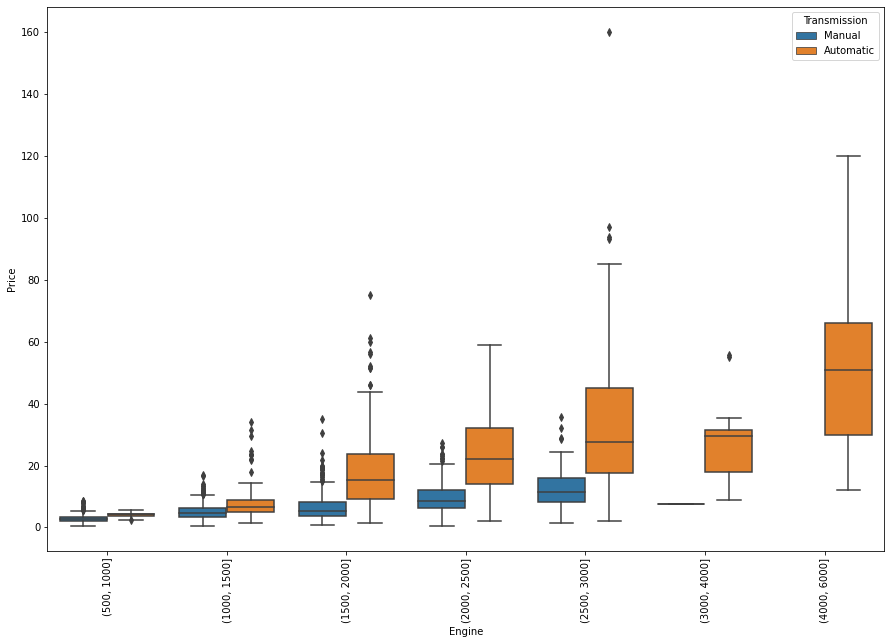

In [116]:
plt.figure(figsize=(15, 10))
x=pd.cut(df_cars['Engine'],[500,1000,1500,2000,2500,3000,4000,6000],precision=0)
plt.xticks(rotation = 90)
sns.boxplot(x=x, y='Price',hue='Transmission', data=df_cars )
plt.show()

Even across the different Engine capacities(given in CC), the price of Automatic transmission cars is significantly higher than that of the Manual transmission ones. This would mostly be due to the advanced sensors and other allied systems used in Automatic transmission cars.

In [117]:
df_cars.head()

Brand   Model_Type Fuel_Type Transmission Owner_Type    Location  Age  \
0   Maruti    Hatchback       CNG       Manual      First      Mumbai    9   
1  Hyundai  SUV/MUV/MPV    Diesel       Manual      First        Pune    4   
2    Honda    Hatchback    Petrol       Manual      First     Chennai    8   
3   Maruti  SUV/MUV/MPV    Diesel       Manual      First     Chennai    7   
4     Audi        Sedan    Diesel    Automatic     Second  Coimbatore    6   

   Kilometers_Driven  Mileage_Converted  Engine   Power  Seats  Price  
0              72000              19.00     998   58.16      5   1.75  
1              41000              19.67    1582  126.20      5  12.50  
2              46000              18.20    1199   88.70      5   4.50  
3              87000              20.77    1248   88.76      7   6.00  
4              40670              15.20    1968  140.80      5  17.74

## Handling Categorical Data

The dataset df_cars have the following categorical features :-
    
    1) Brand
    
    2) Model_Type
    
    3) Fuel_Type
      
    4) Transmission
    
    5) Owner_Type
    
    6) Location
     

In [118]:
cars_coded=df_cars.copy()     #Copying the base dataset into a new dataset 'cars_coded'

In [119]:
cars_coded.shape

(5843, 13)

In [120]:
cars_coded.head(2)

Brand   Model_Type Fuel_Type Transmission Owner_Type Location  Age  \
0   Maruti    Hatchback       CNG       Manual      First   Mumbai    9   
1  Hyundai  SUV/MUV/MPV    Diesel       Manual      First     Pune    4   

   Kilometers_Driven  Mileage_Converted  Engine   Power  Seats  Price  
0              72000              19.00     998   58.16      5   1.75  
1              41000              19.67    1582  126.20      5  12.50

When handling categorical variables, they need to be encoded as numerical values. This is because machine understands only numbers and not text. So, the text entities need to be converted to numbers, for the machine to process than using mathematical equations.

For handling categorical data and converting them to numerical (categorical encoding), we mainly use 2 methods, as follows :-
    
    1) Label encoding - for handling ordinal data
    
    2) One-Hot encoding - for handling non-ordinal data
    
    
In our dataset,

The ordinal categorical feature = Owner_Type

The non-ordinal categorical features are = Brand, Model_Type, Fuel_Type, Transmission, Location

#### 1) Owner_Type

This is ordinal data, with the sequnce of ownership being - First, Second, Third, Fourth & Above

In [121]:
cars_coded.replace({"First":3,"Second":2,"Third": 1,"Fourth & Above":0},inplace=True)
cars_coded.head(2)

Brand   Model_Type Fuel_Type Transmission  Owner_Type Location  Age  \
0   Maruti    Hatchback       CNG       Manual           3   Mumbai    9   
1  Hyundai  SUV/MUV/MPV    Diesel       Manual           3     Pune    4   

   Kilometers_Driven  Mileage_Converted  Engine   Power  Seats  Price  
0              72000              19.00     998   58.16      5   1.75  
1              41000              19.67    1582  126.20      5  12.50

In [122]:
cars_coded.shape

(5843, 13)

#### 2) Brand

In [123]:
cars_coded=pd.get_dummies(data=cars_coded,columns=['Brand'],drop_first=True)


In [124]:
cars_coded.head(2)

Model_Type Fuel_Type Transmission  Owner_Type Location  Age  \
0    Hatchback       CNG       Manual           3   Mumbai    9   
1  SUV/MUV/MPV    Diesel       Manual           3     Pune    4   

   Kilometers_Driven  Mileage_Converted  Engine   Power  ...  Brand_Mini  \
0              72000              19.00     998   58.16  ...           0   
1              41000              19.67    1582  126.20  ...           0   

   Brand_Mitsubishi  Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  \
0                 0             0              0              0            0   
1                 0             0              0              0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0  
1           0             0                 0            0  

[2 rows x 40 columns]

In [125]:
cars_coded.shape

(5843, 40)

#### 3) Model_Type

In [126]:
cars_coded=pd.get_dummies(data=cars_coded,columns=['Model_Type'],drop_first=True)

In [127]:
cars_coded.shape

(5843, 43)

#### 4) Location

In [128]:
cars_coded=pd.get_dummies(data=cars_coded,columns=['Location'],drop_first=True)

In [129]:
cars_coded.shape

(5843, 52)

#### 5) Fuel_Type

In [130]:
cars_coded=pd.get_dummies(data=cars_coded,columns=['Fuel_Type'],drop_first=True)

In [131]:
cars_coded.shape

(5843, 54)

#### 6) Transmission

In [132]:
cars_coded=pd.get_dummies(data=cars_coded,columns=['Transmission'],drop_first=True)

In [133]:
cars_coded.head(2)

Owner_Type  Age  Kilometers_Driven  Mileage_Converted  Engine   Power  \
0           3    9              72000              19.00     998   58.16   
1           3    4              41000              19.67    1582  126.20   

   Seats  Price  Brand_Audi  Brand_BMW  ...  Location_Hyderabad  \
0      5   1.75           0          0  ...                   0   
1      5  12.50           0          0  ...                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 0   
1              1                 1              0                 0   

   Transmission_Manual  
0                    1  
1                    1  

[2 rows x 54 columns]

In [134]:
cars_coded.shape

(5843, 54)

## Data transformation

Since our dataset has a number of outliers and we are not removing the outliers (except the anomalies), we are using Transformation techniques to bring the outliers closers to the major chunk of the data distribution. 

During data transformation, the characteristics of the data distribution, change.

In [135]:
cars_transform = cars_coded.copy()

In [136]:
cars_transform.head(2)

Owner_Type  Age  Kilometers_Driven  Mileage_Converted  Engine   Power  \
0           3    9              72000              19.00     998   58.16   
1           3    4              41000              19.67    1582  126.20   

   Seats  Price  Brand_Audi  Brand_BMW  ...  Location_Hyderabad  \
0      5   1.75           0          0  ...                   0   
1      5  12.50           0          0  ...                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 0   
1              1                 1              0                 0   

   Transmission_Manual  
0                    1  
1                    1  

[2 rows x 54 columns]

In [137]:
cars_transform['LOG_Kilometers_Driven'] = np.log(cars_transform['Kilometers_Driven'])

In [138]:
cars_transform['LOG_Mileage_Converted'] = np.log(cars_transform['Mileage_Converted'])

In [139]:
cars_transform['LOG_Engine'] = np.log(cars_transform['Engine'])

In [140]:
cars_transform['LOG_Power'] = np.log(cars_transform['Power'])

In [141]:
cars_transform['LOG_Seats'] = np.log(cars_transform['Seats'])

In [142]:
cars_transform['LOG_Price'] = np.log(cars_transform['Price'])

In [143]:
cars_transform.head(2)

Owner_Type  Age  Kilometers_Driven  Mileage_Converted  Engine   Power  \
0           3    9              72000              19.00     998   58.16   
1           3    4              41000              19.67    1582  126.20   

   Seats  Price  Brand_Audi  Brand_BMW  ...  Fuel_Type_Diesel  Fuel_Type_LPG  \
0      5   1.75           0          0  ...                 0              0   
1      5  12.50           0          0  ...                 1              0   

   Fuel_Type_Petrol  Transmission_Manual  LOG_Kilometers_Driven  \
0                 0                    1              11.184421   
1                 0                    1              10.621327   

   LOG_Mileage_Converted  LOG_Engine  LOG_Power  LOG_Seats  LOG_Price  
0               2.944439    6.905753   4.063198   1.609438   0.559616  
1               2.979095    7.366445   4.837868   1.609438   2.525729  

[2 rows x 60 columns]

In [144]:
cars_transform[['Age','Kilometers_Driven','Mileage_Converted','Engine', 'Power','Seats','Price','LOG_Kilometers_Driven','LOG_Mileage_Converted','LOG_Engine','LOG_Power','LOG_Seats','LOG_Price']].skew()

Age                      0.824621
Kilometers_Driven        4.317791
Mileage_Converted        0.114339
Engine                   1.427928
Power                    1.930116
Seats                    1.907071
Price                    3.370826
LOG_Kilometers_Driven   -1.359591
LOG_Mileage_Converted   -0.435723
LOG_Engine               0.406033
LOG_Power                0.451262
LOG_Seats                0.920085
LOG_Price                0.444489
dtype: float64

In [145]:
cars_transform[['Age','Kilometers_Driven','Mileage_Converted','Engine', 'Power','Seats','Price','LOG_Kilometers_Driven','LOG_Mileage_Converted','LOG_Engine','LOG_Power','LOG_Seats','LOG_Price']].kurt()

Age                       0.911852
Kilometers_Driven        55.894206
Mileage_Converted        -0.482610
Engine                    3.203972
Power                     6.608526
Seats                     4.037775
Price                    17.527449
LOG_Kilometers_Driven     4.460564
LOG_Mileage_Converted    -0.124210
LOG_Engine               -0.013405
LOG_Power                 0.126606
LOG_Seats                 6.929760
LOG_Price                 0.213855
dtype: float64

From the above, we can see that there is a considerable change in the skewness and kurtosis of the numerical variables, after the LOG transformation

##### Dropping the already transformed columns - Kilometers_Driven', 'Mileage_Converted', 'Engine', 'Power', 'Seats', 'Price'

In [146]:
cars_transform.drop(['Kilometers_Driven','Mileage_Converted','Engine','Power','Seats','Price'],axis=1,inplace=True)

In [147]:
cars_transform.head(2)

Owner_Type  Age  Brand_Audi  Brand_BMW  Brand_Bentley  Brand_Chevrolet  \
0           3    9           0          0              0                0   
1           3    4           0          0              0                0   

   Brand_Datsun  Brand_Fiat  Brand_Force  Brand_Ford  ...  Fuel_Type_Diesel  \
0             0           0            0           0  ...                 0   
1             0           0            0           0  ...                 1   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0              0                 0                    1   
1              0                 0                    1   

   LOG_Kilometers_Driven  LOG_Mileage_Converted  LOG_Engine  LOG_Power  \
0              11.184421               2.944439    6.905753   4.063198   
1              10.621327               2.979095    7.366445   4.837868   

   LOG_Seats  LOG_Price  
0   1.609438   0.559616  
1   1.609438   2.525729  

[2 rows x 54 columns]

## Scaling of data

Our dataset has several features(or columns) having data spread across different ranges and having different units. ML systems need not recognize this and just gives weightage to the value, irrespective of their units.

Scaling helps to bring the data across several features, to the same band.

We will be using the Standardization (Z score) technique to scale our data. This is because we are also considering the outliers in our dataset.

In [148]:
cars_scaling = cars_transform.copy()

In [149]:
cars_scaling.head(2)

Owner_Type  Age  Brand_Audi  Brand_BMW  Brand_Bentley  Brand_Chevrolet  \
0           3    9           0          0              0                0   
1           3    4           0          0              0                0   

   Brand_Datsun  Brand_Fiat  Brand_Force  Brand_Ford  ...  Fuel_Type_Diesel  \
0             0           0            0           0  ...                 0   
1             0           0            0           0  ...                 1   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0              0                 0                    1   
1              0                 0                    1   

   LOG_Kilometers_Driven  LOG_Mileage_Converted  LOG_Engine  LOG_Power  \
0              11.184421               2.944439    6.905753   4.063198   
1              10.621327               2.979095    7.366445   4.837868   

   LOG_Seats  LOG_Price  
0   1.609438   0.559616  
1   1.609438   2.525729  

[2 rows x 54 columns]

In [150]:
cars_scaling['Z_Age'] = zscore(cars_scaling['Age'])

In [151]:
cars_scaling['Z_Kilometers_Driven'] = zscore(cars_scaling['LOG_Kilometers_Driven'])

In [152]:
cars_scaling['Z_Mileage_Converted'] = zscore(cars_scaling['LOG_Mileage_Converted'])

In [153]:
cars_scaling['Z_Engine'] = zscore(cars_scaling['LOG_Engine'])

In [154]:
cars_scaling['Z_Power'] = zscore(cars_scaling['LOG_Power'])

In [155]:
cars_scaling['Z_Seats'] = zscore(cars_scaling['LOG_Seats'])

In [156]:
cars_scaling['Z_Price'] = zscore(cars_scaling['LOG_Price'])

In [157]:
cars_scaling.head(2)

Owner_Type  Age  Brand_Audi  Brand_BMW  Brand_Bentley  Brand_Chevrolet  \
0           3    9           0          0              0                0   
1           3    4           0          0              0                0   

   Brand_Datsun  Brand_Fiat  Brand_Force  Brand_Ford  ...  LOG_Power  \
0             0           0            0           0  ...   4.063198   
1             0           0            0           0  ...   4.837868   

   LOG_Seats  LOG_Price     Z_Age  Z_Kilometers_Driven  Z_Mileage_Converted  \
0   1.609438   0.559616  1.100276             0.608845             0.277484   
1   1.609438   2.525729 -0.480397            -0.179340             0.424870   

   Z_Engine   Z_Power   Z_Seats   Z_Price  
0 -1.265936 -1.379485 -0.325068 -1.491315  
1  0.100868  0.484247 -0.325068  0.795428  

[2 rows x 61 columns]

##### Dropping the already scaled columns - 'Year','LOG_Kilometers_Driven','LOG_Mileage_Converted','LOG_Engine','LOG_Power','LOG_Seats','LOG_Price'

In [158]:
cars_scaling.drop(['Age','LOG_Kilometers_Driven','LOG_Mileage_Converted','LOG_Engine','LOG_Power','LOG_Seats','LOG_Price'],axis=1,inplace=True)

In [159]:
cars_scaling.head(2)

Owner_Type  Brand_Audi  Brand_BMW  Brand_Bentley  Brand_Chevrolet  \
0           3           0          0              0                0   
1           3           0          0              0                0   

   Brand_Datsun  Brand_Fiat  Brand_Force  Brand_Ford  Brand_Honda  ...  \
0             0           0            0           0            0  ...   
1             0           0            0           0            0  ...   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual     Z_Age  \
0              0                 0                    1  1.100276   
1              0                 0                    1 -0.480397   

   Z_Kilometers_Driven  Z_Mileage_Converted  Z_Engine   Z_Power   Z_Seats  \
0             0.608845             0.277484 -1.265936 -1.379485 -0.325068   
1            -0.179340             0.424870  0.100868  0.484247 -0.325068   

    Z_Price  
0 -1.491315  
1  0.795428  

[2 rows x 54 columns]

## Details about the datatsets used

1) df_cars - Original dataset after removal of null values, feature engineering, anomaly removal (Used in data visualization)

2) df_model_type - Dataset which contains details about the Model type of the cars, sourced from Cars24.com and Cardekho.com. This is merged with df_cars before visualization.

2) cars_coded - 'df_cars' dataset with its categorical features coded with numerical values based on One-Hot Encoding/Label Encoding. This is the dataset before transformation and scaling.

3) cars_transform - 'cars_coded' dataset having its numerical variables LOG transformed

4) cars_scaling - Final Dataset that would be used for model building. 'cars_transform' dataset with its numerical variables brought to the same scale using Zscore scaling


The Assumptions of Linear Regression shall be performed on both 'cars_coded' and 'cars_scaling' datasets 

# Linear Regression Assumption Diagnostics

Assumption 1 : The linear regression model is linear in the parameters
    
Assumption 2 : Residuals are normally distributed
    
Assumption 3 : Homoscedasticity or constant varaince, that is,  Variance of Residuals is constant

  
Assumption 4 : There is no perfect multicollinearity between among the explanatory(independent) variables, ie, there is no perfect linear relationship among the independent variables
    
Assumption 5 : Linearity of relationship. This is not to check if the model is linear or not. Ideally, the residual plot would show no pattern. For a proper linear model, the plotted line of the residual plot, should be approximately horizontal at Zero (with the residuals scattered around the 0 line). The presence of a pattern would indicate a problem with some aspect of the linear model.
    
Assumption 6 : The number of observations 'n' must be greater than the number of parameters to be estimated.
    

------------------------------------------------------------------------------------------------------------------------------

We are doing the assumption diagnostic on both the datasets - The 'cars_coded' dataset(non-transformed and non-scaled) and also on the 'cars_scaling' dataset(transformed and scaled dataset).

This will help us in chosing the correct dataset to be used for ML, more accurately.

## Linear Regression Assumption Diagnostics on the dataset before transformation and scaling - 'cars_coded'

In [160]:
y=cars_coded['Price']
X=cars_coded.drop('Price',axis=1)

In [161]:
import statsmodels.api as sm

In [162]:
Xc=sm.add_constant(X)

In [163]:
### -------------------- Backward elimination to select significant features ---------------


cols=list(Xc.columns)
pmax=1

while len(cols)>0:
    X1=Xc[cols]
    model=sm.OLS(y,X1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print('removed : ', feature_max_p, 'prob : ',pmax)
    else:
        break
selected_features_BE=cols
print('\n The Selected features are :- \n',selected_features_BE)

removed :  Brand_Audi prob :  0.9634693940558292
removed :  Fuel_Type_Petrol prob :  0.8733360902421687
removed :  Seats prob :  0.8332673560289666
removed :  Location_Kochi prob :  0.5711846998967458
removed :  Fuel_Type_LPG prob :  0.5443930105656077
removed :  Transmission_Manual prob :  0.3513460207894398
removed :  Brand_Bentley prob :  0.23657512973557956
removed :  Brand_BMW prob :  0.08507099154727575
removed :  Location_Delhi prob :  0.07230842595583534
removed :  Location_Mumbai prob :  0.08360202658428079
removed :  Model_Type_Minivan prob :  0.06631231391465525
removed :  Owner_Type prob :  0.060174608345794245

 The Selected features are :- 
 ['const', 'Age', 'Kilometers_Driven', 'Mileage_Converted', 'Engine', 'Power', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini

In [164]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     529.4
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        06:59:48   Log-Likelihood:                -17841.
No. Observations:                5843   AIC:                         3.577e+04
Df Residuals:                    5801   BIC:                         3.605e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21.2485      1.480     14.358      0.000      18.347      24.150
Age                       -0.9219      0.028    -32.557      0.000      -0.977      -0.866
Kilometers_Driven      -1.923e-05   2.23e-06     -8.625      0.000   -2.36e-05   -1.49e-05
Mileage_Converted         -0.0952      0.033     -2.887      0.004      -0.160      -0.031
Engine                     0.0018      0.000      4.672      0.000       0.001       0.002
Power                      0.0779      0.004     19.186      0.000       0.070       0.086
Brand_Chevrolet           -9.1893      0.584    -15.726      0.000     -10.335      -8.044
Brand_Datsun             -11.1440      1.499     -7.437      0.000     -14.082      -8.206
Brand_Fiat                -8.9780      1.129     -7.954      0.000     -11.191      -6.765
Brand_Force              -11.8789      2.996     -3.965      0.000     -17.752      -6.006
Brand_Ford                -8.7142      0.467    -18.676      0.000      -9.629      -7.799
Brand_Honda               -9.0046      0.405    -22.230      0.000      -9.799      -8.210
Brand_Hyundai             -9.0558      0.384    -23.611      0.000      -9.808      -8.304
Brand_ISUZU              -13.4341      3.007     -4.467      0.000     -19.329      -7.539
Brand_Jaguar               7.9990      0.858      9.323      0.000       6.317       9.681
Brand_Jeep                -8.6220      1.363     -6.326      0.000     -11.294      -5.950
Brand_Lamborghini         54.0932      5.272     10.261      0.000      43.758      64.428
Brand_Land                14.3640      0.773     18.587      0.000      12.849      15.879
Brand_Mahindra           -11.9271      0.493    -24.176      0.000     -12.894     -10.960
Brand_Maruti              -7.8968      0.415    -19.028      0.000      -8.710      -7.083
Brand_Mercedes-Benz        1.5306      0.383      4.001      0.000       0.781       2.281
Brand_Mini                 3.0404      1.072      2.835      0.005       0.938       5.143
Brand_Mitsubishi          -8.4799      1.067     -7.949      0.000     -10.571      -6.389
Brand_Nissan              -9.3314      0.657    -14.198      0.000     -10.620      -8.043
Brand_Porsche             11.1429      1.348      8.269      0.000       8.501      13.785
Brand_Renault            -10.2417      0.574    -17.844      0.000     -11.367      -9.116
Brand_Skoda               -8.1714      0.502    -16.268      0.000      -9.156      -7.187
Brand_Tata                -9.9558      0.534    -18.658      0.000     -11.002      -8.910
Brand_Toyota              -7.4461      0.469    -15.866      0.000      -8.366      -6.526
Brand_Volkswagen          -9.1975      0.448    -20.532      0.000     -10.076      -8.319
Brand_Volvo               -5.2513      1.150     -4.567      0.000      -7.505  

#### 1) Normality of Residuals

In [165]:
residuals=model.resid

In [166]:
residuals

0       3.288673
1       0.872280
2       1.238292
3      -0.308273
4      -2.824250
          ...   
5838   -0.351333
5839    0.520910
5840   -4.360727
5841    0.908641
5842    1.182198
Length: 5843, dtype: float64

C:\Users\arunk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



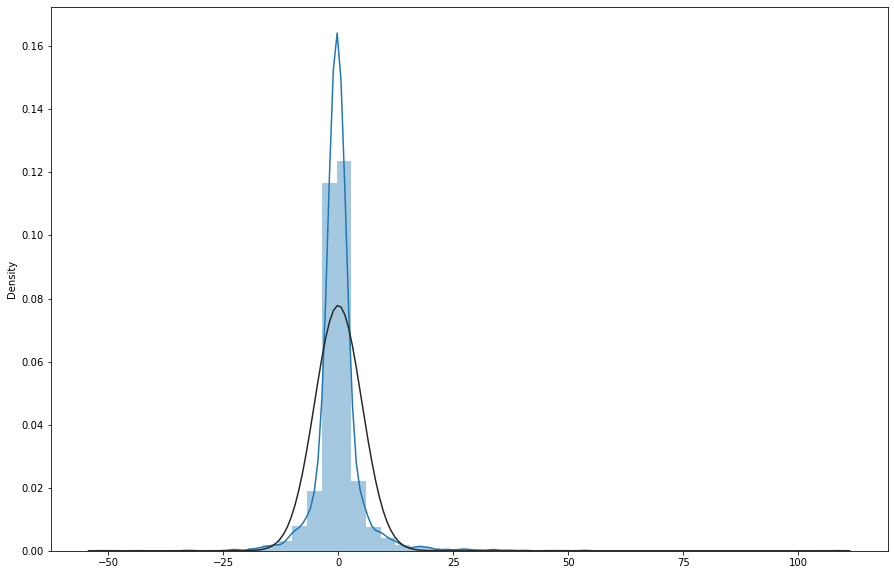

In [167]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit=norm)
plt.show()

Black curve is normal distribution using same mean and standard deviation as our residual. if the residuals were purely normal, it would have looked like the black curve.

##### QQ Plot

In [168]:
import scipy.stats as stats

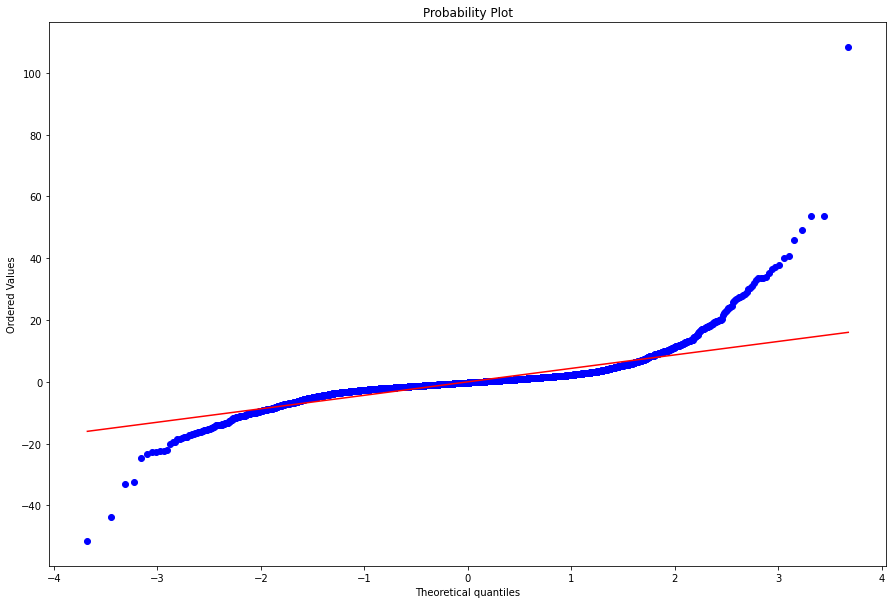

In [169]:
stats.probplot(residuals, plot=plt)
plt.show()

The straight line shows the ideal normal distribution of the residuals.

For extreme larger and extreme smaller values for residuals, especially for the high positive values, it is going away from normality, quite a bit

##### Jarque-Berra Test

In [170]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=674733.8897859065, pvalue=0.0)


Ho : Data is normal

Ha : Data is not normal
    
Since p-value = 0.0, we will reject Ho and conclude that residuals are not normal

#### 2) Multicollinearity

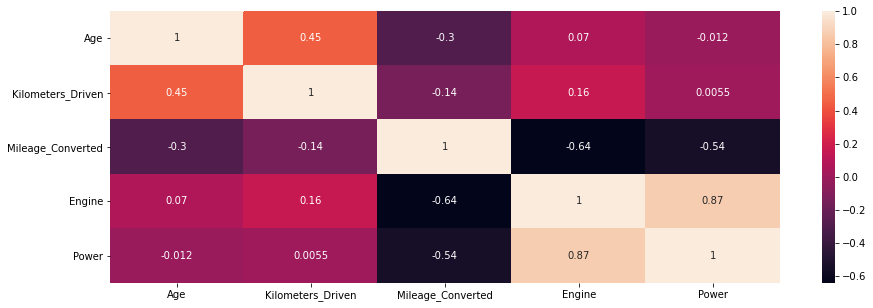

In [171]:
plt.figure(figsize=(15,5))
sns.heatmap(X[['Age', 'Kilometers_Driven', 'Mileage_Converted', 'Engine','Power']].corr(), annot=True)
plt.show()

In [172]:
Xc[selected_features_BE].columns

Index(['const', 'Age', 'Kilometers_Driven', 'Mileage_Converted', 'Engine',
       'Power', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Model_Type_Hatchback', 'Model_Type_SUV/MUV/MPV',
       'Model_Type_Sedan', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Fuel_Type_Diesel'],
      dtype='object')

##### variance_inflation_factor or vif

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [174]:
vf=[vif(Xc[selected_features_BE].values,i) for i in range(Xc[selected_features_BE].shape[1])]
pd.DataFrame(vf,index=Xc[selected_features_BE].columns, columns=['vif'])

vif
const                   483.392105
Age                       1.770782
Kilometers_Driven         1.565456
Mileage_Converted         4.070502
Engine                   11.145735
Power                    10.532450
Brand_Chevrolet           1.515928
Brand_Datsun              1.100189
Brand_Fiat                1.102460
Brand_Force               1.016554
Brand_Ford                2.296114
Brand_Honda               3.336779
Brand_Hyundai             4.789388
Brand_ISUZU               1.024171
Brand_Jaguar              1.104737
Brand_Jeep                1.049925
Brand_Lamborghini         1.049639
Brand_Land                1.140430
Brand_Mahindra            2.350832
Brand_Maruti              6.106989
Brand_Mercedes-Benz       1.592797
Brand_Mini                1.124472
Brand_Mitsubishi          1.155223
Brand_Nissan              1.430086
Brand_Porsche             1.094452
Brand_Renault             1.759574
Brand_Skoda               1.572935
Brand_Tata                1.906496
Brand_Toyota              3.056984
Brand_Volkswagen          2.252028
Brand_Volvo               1.044774
Model_Type_Hatchback     53.783652
Model_Type_SUV/MUV/MPV   44.567410
Model_Type_Sedan         53.277993
Location_Bangalore        1.116856
Location_Chennai          1.199166
Location_Coimbatore       1.190640
Location_Hyderabad        1.252661
Location_Jaipur           1.165005
Location_Kolkata          1.172184
Location_Pune             1.198427
Fuel_Type_Diesel          3.144454

There is significant multicollinearity among some of the independent variables

#### 3) Constant variance of residuals (Homoscedasticity)

In [175]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     529.4
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        06:59:51   Log-Likelihood:                -17841.
No. Observations:                5843   AIC:                         3.577e+04
Df Residuals:                    5801   BIC:                         3.605e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21.2485      1.480     14.358      0.000      18.347      24.150
Age                       -0.9219      0.028    -32.557      0.000      -0.977      -0.866
Kilometers_Driven      -1.923e-05   2.23e-06     -8.625      0.000   -2.36e-05   -1.49e-05
Mileage_Converted         -0.0952      0.033     -2.887      0.004      -0.160      -0.031
Engine                     0.0018      0.000      4.672      0.000       0.001       0.002
Power                      0.0779      0.004     19.186      0.000       0.070       0.086
Brand_Chevrolet           -9.1893      0.584    -15.726      0.000     -10.335      -8.044
Brand_Datsun             -11.1440      1.499     -7.437      0.000     -14.082      -8.206
Brand_Fiat                -8.9780      1.129     -7.954      0.000     -11.191      -6.765
Brand_Force              -11.8789      2.996     -3.965      0.000     -17.752      -6.006
Brand_Ford                -8.7142      0.467    -18.676      0.000      -9.629      -7.799
Brand_Honda               -9.0046      0.405    -22.230      0.000      -9.799      -8.210
Brand_Hyundai             -9.0558      0.384    -23.611      0.000      -9.808      -8.304
Brand_ISUZU              -13.4341      3.007     -4.467      0.000     -19.329      -7.539
Brand_Jaguar               7.9990      0.858      9.323      0.000       6.317       9.681
Brand_Jeep                -8.6220      1.363     -6.326      0.000     -11.294      -5.950
Brand_Lamborghini         54.0932      5.272     10.261      0.000      43.758      64.428
Brand_Land                14.3640      0.773     18.587      0.000      12.849      15.879
Brand_Mahindra           -11.9271      0.493    -24.176      0.000     -12.894     -10.960
Brand_Maruti              -7.8968      0.415    -19.028      0.000      -8.710      -7.083
Brand_Mercedes-Benz        1.5306      0.383      4.001      0.000       0.781       2.281
Brand_Mini                 3.0404      1.072      2.835      0.005       0.938       5.143
Brand_Mitsubishi          -8.4799      1.067     -7.949      0.000     -10.571      -6.389
Brand_Nissan              -9.3314      0.657    -14.198      0.000     -10.620      -8.043
Brand_Porsche             11.1429      1.348      8.269      0.000       8.501      13.785
Brand_Renault            -10.2417      0.574    -17.844      0.000     -11.367      -9.116
Brand_Skoda               -8.1714      0.502    -16.268      0.000      -9.156      -7.187
Brand_Tata                -9.9558      0.534    -18.658      0.000     -11.002      -8.910
Brand_Toyota              -7.4461      0.469    -15.866      0.000      -8.366      -6.526
Brand_Volkswagen          -9.1975      0.448    -20.532      0.000     -10.076      -8.319
Brand_Volvo               -5.2513      1.150     -4.567      0.000      -7.505  

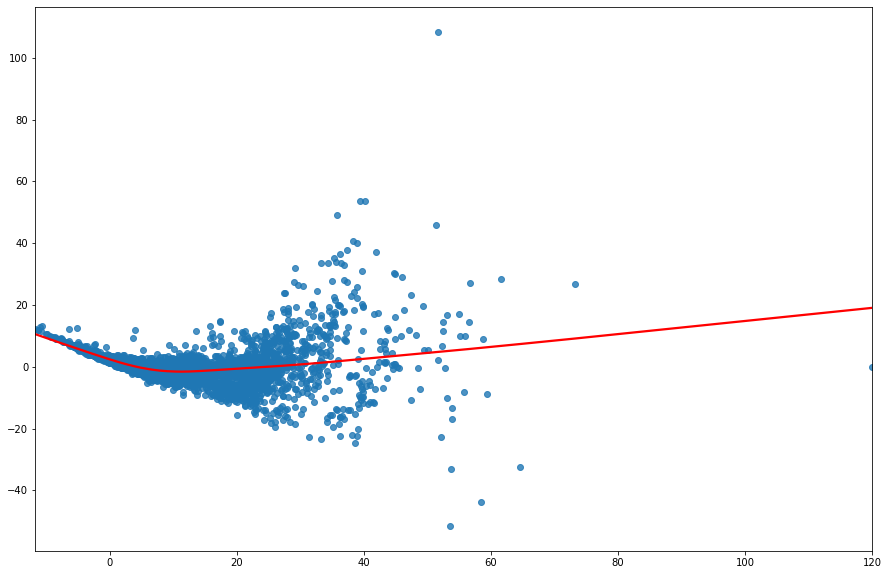

In [176]:
residuals=model.resid
y_pred=model.predict(Xc[selected_features_BE])
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

##### Goldfeld Test

In [177]:
import statsmodels.stats.api as sms
test=sms.het_goldfeldquandt(y=model.resid, x=Xc[selected_features_BE])
test

(0.9037884006293395, 0.9966745842868321, 'increasing')

Ho : Variance is constant across the range of data
    
Ha : Variance is not constant across the range of data
    
    
    Since p-value=0.996, we will accept Ho to aconclude that variance of residuals is constant

#### 4) Linearity of Relationship - checking if the model is appropriate

In [178]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     529.4
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:02   Log-Likelihood:                -17841.
No. Observations:                5843   AIC:                         3.577e+04
Df Residuals:                    5801   BIC:                         3.605e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21.2485      1.480     14.358      0.000      18.347      24.150
Age                       -0.9219      0.028    -32.557      0.000      -0.977      -0.866
Kilometers_Driven      -1.923e-05   2.23e-06     -8.625      0.000   -2.36e-05   -1.49e-05
Mileage_Converted         -0.0952      0.033     -2.887      0.004      -0.160      -0.031
Engine                     0.0018      0.000      4.672      0.000       0.001       0.002
Power                      0.0779      0.004     19.186      0.000       0.070       0.086
Brand_Chevrolet           -9.1893      0.584    -15.726      0.000     -10.335      -8.044
Brand_Datsun             -11.1440      1.499     -7.437      0.000     -14.082      -8.206
Brand_Fiat                -8.9780      1.129     -7.954      0.000     -11.191      -6.765
Brand_Force              -11.8789      2.996     -3.965      0.000     -17.752      -6.006
Brand_Ford                -8.7142      0.467    -18.676      0.000      -9.629      -7.799
Brand_Honda               -9.0046      0.405    -22.230      0.000      -9.799      -8.210
Brand_Hyundai             -9.0558      0.384    -23.611      0.000      -9.808      -8.304
Brand_ISUZU              -13.4341      3.007     -4.467      0.000     -19.329      -7.539
Brand_Jaguar               7.9990      0.858      9.323      0.000       6.317       9.681
Brand_Jeep                -8.6220      1.363     -6.326      0.000     -11.294      -5.950
Brand_Lamborghini         54.0932      5.272     10.261      0.000      43.758      64.428
Brand_Land                14.3640      0.773     18.587      0.000      12.849      15.879
Brand_Mahindra           -11.9271      0.493    -24.176      0.000     -12.894     -10.960
Brand_Maruti              -7.8968      0.415    -19.028      0.000      -8.710      -7.083
Brand_Mercedes-Benz        1.5306      0.383      4.001      0.000       0.781       2.281
Brand_Mini                 3.0404      1.072      2.835      0.005       0.938       5.143
Brand_Mitsubishi          -8.4799      1.067     -7.949      0.000     -10.571      -6.389
Brand_Nissan              -9.3314      0.657    -14.198      0.000     -10.620      -8.043
Brand_Porsche             11.1429      1.348      8.269      0.000       8.501      13.785
Brand_Renault            -10.2417      0.574    -17.844      0.000     -11.367      -9.116
Brand_Skoda               -8.1714      0.502    -16.268      0.000      -9.156      -7.187
Brand_Tata                -9.9558      0.534    -18.658      0.000     -11.002      -8.910
Brand_Toyota              -7.4461      0.469    -15.866      0.000      -8.366      -6.526
Brand_Volkswagen          -9.1975      0.448    -20.532      0.000     -10.076      -8.319
Brand_Volvo               -5.2513      1.150     -4.567      0.000      -7.505  

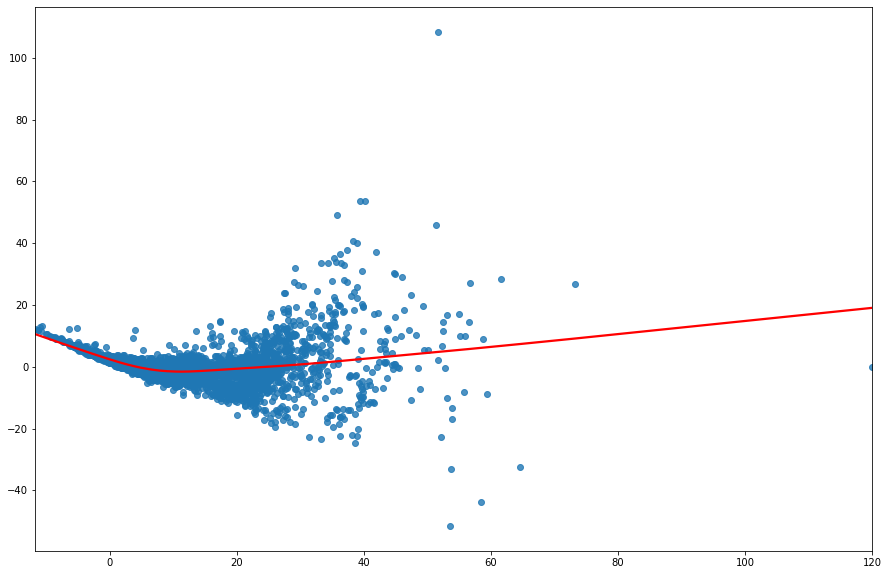

In [179]:
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

Red line shows the broad pattern of data. The residual plot is showing that the residuals have a pattern.

##### Rainbow Test

In [180]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model,frac=0.5)

(0.8962090626618758, 0.9984149277425708)

Ho : Fit of sample using full sample = fit of model using a central subset (linear relationship)

Ha : Fit of sample using full sample is worse compared to fit of model using a central subset
    
    Since p-value (0.99) is higher than significance level (0.05), we will accept Ho to conclude that our model is appropriate

---------------------------------------------------------------------------------------------------------------------------

## Linear Regression Assumption Diagnostics on the dataset after transformation and scaling - 'cars_scaling'

#### 1) Multicollinearity

###### Attempt 1

In [181]:
y=cars_scaling['Z_Price']
X=cars_scaling.drop('Z_Price',axis=1)

In [182]:
import statsmodels.api as sm

In [183]:
Xc=sm.add_constant(X)

In [184]:
### -------------------------------------- Backward elimination to select significant features ------------


cols=list(Xc.columns)
pmax=1

while len(cols)>0:
    X1=Xc[cols]
    model=sm.OLS(y,X1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print('removed : ', feature_max_p, 'prob : ',pmax)
    else:
        break
selected_features_BE=cols
print('\n The Selected features are :- \n',selected_features_BE)

removed :  Brand_Audi prob :  0.9897908977872044
removed :  Fuel_Type_Petrol prob :  0.9227698835244184
removed :  Fuel_Type_LPG prob :  0.5865932097211561
removed :  Model_Type_Minivan prob :  0.4285705210456324
removed :  Z_Mileage_Converted prob :  0.40982153685281664
removed :  Location_Chennai prob :  0.15870911695811576
removed :  Brand_BMW prob :  0.10287062037688041

 The Selected features are :- 
 ['const', 'Owner_Type', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Model_Type_Hatchback', 'Model_Type_SUV/MUV/MPV', 'Model_Type_Sedan', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi', 'Loca

In [185]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1946.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:12   Log-Likelihood:                -110.78
No. Observations:                5843   AIC:                             315.6
Df Residuals:                    5796   BIC:                             629.2
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7073      0.060     11.872      0.000       0.590       0.824
Owner_Type                 0.0754      0.008      9.292      0.000       0.059       0.091
Brand_Bentley              0.9800      0.250      3.926      0.000       0.491       1.469
Brand_Chevrolet           -1.0395      0.029    -36.400      0.000      -1.095      -0.983
Brand_Datsun              -1.1417      0.072    -15.760      0.000      -1.284      -1.000
Brand_Fiat                -0.9166      0.055    -16.805      0.000      -1.023      -0.810
Brand_Force               -0.6836      0.144     -4.733      0.000      -0.967      -0.400
Brand_Ford                -0.7989      0.022    -35.546      0.000      -0.843      -0.755
Brand_Honda               -0.7177      0.019    -37.219      0.000      -0.756      -0.680
Brand_Hyundai             -0.6981      0.019    -37.446      0.000      -0.735      -0.662
Brand_ISUZU               -0.9985      0.145     -6.909      0.000      -1.282      -0.715
Brand_Jaguar               0.2194      0.041      5.326      0.000       0.139       0.300
Brand_Jeep                -0.5962      0.066     -8.982      0.000      -0.726      -0.466
Brand_Lamborghini          1.1401      0.254      4.491      0.000       0.642       1.638
Brand_Land                 0.2775      0.037      7.458      0.000       0.205       0.350
Brand_Mahindra            -0.9035      0.025    -36.069      0.000      -0.953      -0.854
Brand_Maruti              -0.6567      0.020    -32.472      0.000      -0.696      -0.617
Brand_Mercedes-Benz        0.0799      0.018      4.361      0.000       0.044       0.116
Brand_Mini                 0.3951      0.051      7.706      0.000       0.295       0.496
Brand_Mitsubishi          -0.4599      0.051     -9.014      0.000      -0.560      -0.360
Brand_Nissan              -0.7602      0.032    -24.020      0.000      -0.822      -0.698
Brand_Porsche              0.1657      0.064      2.579      0.010       0.040       0.292
Brand_Renault             -0.8108      0.028    -29.325      0.000      -0.865      -0.757
Brand_Skoda               -0.6120      0.024    -25.720      0.000      -0.659      -0.565
Brand_Tata                -1.1527      0.026    -44.014      0.000      -1.204      -1.101
Brand_Toyota              -0.4307      0.022    -19.174      0.000      -0.475      -0.387
Brand_Volkswagen          -0.6823      0.022    -31.637      0.000      -0.725      -0.640
Brand_Volvo               -0.1951      0.055     -3.529      0.000      -0.303      -0.087
Model_Type_Hatchback      -0.3661      0.052     -7.052      0.000      -0.468      -0.264
Model_Type_SUV/MUV/MPV    -0.1500      0.053     -2.821      0.005      -0.254      -0.046
Model_Type_Sedan          -0.3509      0.051     -6.914      0.000      -0.450  

In [186]:
Xc[selected_features_BE].columns

Index(['const', 'Owner_Type', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Model_Type_Hatchback', 'Model_Type_SUV/MUV/MPV', 'Model_Type_Sedan',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Transmission_Manual', 'Z_Age',
       'Z_Kilometers_Driven', 'Z_Engine', 'Z_Power', 'Z_Seats'],
      dtype='object')

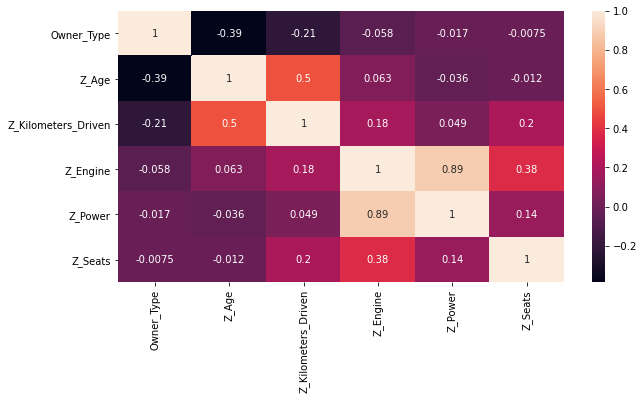

In [187]:
plt.figure(figsize=(10,5))
sns.heatmap(X[['Owner_Type','Z_Age','Z_Kilometers_Driven', 'Z_Engine', 'Z_Power', 'Z_Seats']].corr(), annot=True)
plt.show()

##### variance_inflation_factor or vif

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [189]:
vf=[vif(Xc[selected_features_BE].values,i) for i in range(Xc[selected_features_BE].shape[1])]
pd.DataFrame(vf,index=Xc[selected_features_BE].columns, columns=['vif'])

vif
const                   338.294702
Owner_Type                1.247185
Brand_Bentley             1.016368
Brand_Chevrolet           1.563466
Brand_Datsun              1.110442
Brand_Fiat                1.111625
Brand_Force               1.020457
Brand_Ford                2.300697
Brand_Honda               3.265845
Brand_Hyundai             4.886616
Brand_ISUZU               1.021605
Brand_Jaguar              1.099239
Brand_Jeep                1.075114
Brand_Lamborghini         1.051150
Brand_Land                1.141519
Brand_Mahindra            2.616963
Brand_Maruti              6.261922
Brand_Mercedes-Benz       1.576375
Brand_Mini                1.109900
Brand_Mitsubishi          1.141198
Brand_Nissan              1.431856
Brand_Porsche             1.074518
Brand_Renault             1.763038
Brand_Skoda               1.524182
Brand_Tata                1.983414
Brand_Toyota              3.024717
Brand_Volkswagen          2.254155
Brand_Volvo               1.042945
Model_Type_Hatchback     58.696167
Model_Type_SUV/MUV/MPV   51.897049
Model_Type_Sedan         57.899388
Location_Bangalore        1.438009
Location_Coimbatore       1.839322
Location_Delhi            1.660550
Location_Hyderabad        1.827115
Location_Jaipur           1.494220
Location_Kochi            1.870636
Location_Kolkata          1.681157
Location_Mumbai           1.953561
Location_Pune             1.683143
Fuel_Type_Diesel          1.953713
Transmission_Manual       2.270436
Z_Age                     2.064585
Z_Kilometers_Driven       1.789952
Z_Engine                 11.817106
Z_Power                  10.774250
Z_Seats                   3.106815

There is significant multicollinearity among some of the independent variables - 'Model_Type_Hatchback','Model_Type_SUV/MUV/MPV','Model_Type_Sedan','Z_Engine','Z_Power'

After dropping the column having the highest vif value, ie, 'Model_Type_Hatchback', we will run the model again.

##### Attempt 2

In [190]:
y=cars_scaling['Z_Price']
X=cars_scaling.drop(['Z_Price','Model_Type_Hatchback'], axis=1)

In [191]:
import statsmodels.api as sm

In [192]:
Xc=sm.add_constant(X)

In [193]:
cols=list(Xc.columns)
pmax=1

while len(cols)>0:
    X1=Xc[cols]
    model=sm.OLS(y,X1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print('removed : ', feature_max_p, 'prob : ',pmax)
    else:
        break
selected_features_BE=cols
print('\n The Selected features are :- \n',selected_features_BE)

removed :  Fuel_Type_Petrol prob :  0.983244105691759
removed :  Model_Type_Sedan prob :  0.9566479215206952
removed :  Brand_Audi prob :  0.9510870663099813
removed :  Fuel_Type_LPG prob :  0.6122160971511822
removed :  Z_Seats prob :  0.596206982159841
removed :  Model_Type_Minivan prob :  0.4144456294302852
removed :  Z_Mileage_Converted prob :  0.3203644207924577
removed :  Location_Chennai prob :  0.14869660387843606
removed :  Brand_BMW prob :  0.08505823349669578

 The Selected features are :- 
 ['const', 'Owner_Type', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Model_Type_SUV/MUV/MPV', 'Location_Bang

In [194]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2064.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:15   Log-Likelihood:                -135.77
No. Observations:                5843   AIC:                             359.5
Df Residuals:                    5799   BIC:                             653.2
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3414      0.029     11.877      0.000       0.285       0.398
Owner_Type                 0.0762      0.008      9.364      0.000       0.060       0.092
Brand_Bentley              0.9028      0.250      3.609      0.000       0.412       1.393
Brand_Chevrolet           -1.0315      0.028    -36.239      0.000      -1.087      -0.976
Brand_Datsun              -1.1269      0.073    -15.535      0.000      -1.269      -0.985
Brand_Fiat                -0.9103      0.055    -16.643      0.000      -1.018      -0.803
Brand_Force               -0.6702      0.145     -4.628      0.000      -0.954      -0.386
Brand_Ford                -0.7968      0.022    -35.425      0.000      -0.841      -0.753
Brand_Honda               -0.7152      0.019    -37.731      0.000      -0.752      -0.678
Brand_Hyundai             -0.6969      0.019    -37.393      0.000      -0.733      -0.660
Brand_ISUZU               -1.0125      0.145     -6.979      0.000      -1.297      -0.728
Brand_Jaguar               0.2093      0.041      5.064      0.000       0.128       0.290
Brand_Jeep                -0.6142      0.067     -9.235      0.000      -0.745      -0.484
Brand_Lamborghini          1.3485      0.251      5.381      0.000       0.857       1.840
Brand_Land                 0.2655      0.037      7.126      0.000       0.192       0.339
Brand_Mahindra            -0.8844      0.024    -37.153      0.000      -0.931      -0.838
Brand_Maruti              -0.6472      0.020    -32.247      0.000      -0.687      -0.608
Brand_Mercedes-Benz        0.0762      0.018      4.146      0.000       0.040       0.112
Brand_Mini                 0.4516      0.050      8.952      0.000       0.353       0.550
Brand_Mitsubishi          -0.4613      0.051     -9.011      0.000      -0.562      -0.361
Brand_Nissan              -0.7589      0.032    -23.936      0.000      -0.821      -0.697
Brand_Porsche              0.1387      0.064      2.176      0.030       0.014       0.264
Brand_Renault             -0.8075      0.028    -29.207      0.000      -0.862      -0.753
Brand_Skoda               -0.6114      0.024    -25.911      0.000      -0.658      -0.565
Brand_Tata                -1.1417      0.026    -43.782      0.000      -1.193      -1.091
Brand_Toyota              -0.4208      0.022    -19.281      0.000      -0.464      -0.378
Brand_Volkswagen          -0.6809      0.022    -31.556      0.000      -0.723      -0.639
Brand_Volvo               -0.2037      0.055     -3.673      0.000      -0.312      -0.095
Model_Type_SUV/MUV/MPV     0.2109      0.010     20.507      0.000       0.191       0.231
Location_Bangalore         0.1511      0.017      9.108      0.000       0.119       0.184
Location_Coimbatore        0.0976      0.014      6.848      0.000       0.070  

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [196]:
vf=[vif(Xc[selected_features_BE].values,i) for i in range(Xc[selected_features_BE].shape[1])]
pd.DataFrame(vf,index=Xc[selected_features_BE].columns, columns=['vif'])

vif
const                   78.128518
Owner_Type               1.246684
Brand_Bentley            1.012561
Brand_Chevrolet          1.540889
Brand_Datsun             1.104414
Brand_Fiat               1.108970
Brand_Force              1.017399
Brand_Ford               2.285696
Brand_Honda              3.130316
Brand_Hyundai            4.843880
Brand_ISUZU              1.021165
Brand_Jaguar             1.097801
Brand_Jeep               1.070669
Brand_Lamborghini        1.015832
Brand_Land               1.135375
Brand_Mahindra           2.344398
Brand_Maruti             6.118490
Brand_Mercedes-Benz      1.574859
Brand_Mini               1.065740
Brand_Mitsubishi         1.139620
Brand_Nissan             1.425570
Brand_Porsche            1.049688
Brand_Renault            1.748748
Brand_Skoda              1.486944
Brand_Tata               1.950367
Brand_Toyota             2.831661
Brand_Volkswagen         2.238562
Brand_Volvo              1.041654
Model_Type_SUV/MUV/MPV   1.925030
Location_Bangalore       1.437393
Location_Coimbatore      1.837994
Location_Delhi           1.659307
Location_Hyderabad       1.823789
Location_Jaipur          1.493992
Location_Kochi           1.870290
Location_Kolkata         1.680805
Location_Mumbai          1.951014
Location_Pune            1.683025
Fuel_Type_Diesel         1.900955
Transmission_Manual      2.257228
Z_Age                    2.061466
Z_Kilometers_Driven      1.771665
Z_Engine                10.958821
Z_Power                  9.849544

There is significant multicollinearity among some of the independent variables - 'Z_Engine','Z_Power'

After dropping the column having the highest vif value, ie, 'Z_Engine', we will run the model again.

##### Attempt 3

In [197]:
y=cars_scaling['Z_Price']
X=cars_scaling.drop(['Z_Price','Model_Type_Hatchback','Z_Engine'], axis=1)

In [198]:
import statsmodels.api as sm

In [199]:
Xc=sm.add_constant(X)

In [200]:
cols=list(Xc.columns)
pmax=1

while len(cols)>0:
    X1=Xc[cols]
    model=sm.OLS(y,X1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print('removed : ', feature_max_p, 'prob : ',pmax)
    else:
        break
selected_features_BE=cols
print('\n The Selected features are :- \n',selected_features_BE)

removed :  Model_Type_Sedan prob :  0.9682422810723933
removed :  Brand_Porsche prob :  0.8777725161711771
removed :  Brand_Jaguar prob :  0.7950905006228794
removed :  Fuel_Type_Petrol prob :  0.764294359522437
removed :  Fuel_Type_LPG prob :  0.6362100715113745
removed :  Model_Type_Minivan prob :  0.4843008070193737
removed :  Z_Seats prob :  0.2987812352895962
removed :  Brand_Land prob :  0.24066171498235853
removed :  Location_Chennai prob :  0.10688864633561462

 The Selected features are :- 
 ['const', 'Owner_Type', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Model_Type_SUV/MUV/MPV', 'Location_Bangalore', 'Location_Coim

In [201]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2076.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:16   Log-Likelihood:                -185.31
No. Observations:                5843   AIC:                             456.6
Df Residuals:                    5800   BIC:                             743.6
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5153      0.036     14.174      0.000       0.444       0.587
Owner_Type                 0.0760      0.008      9.258      0.000       0.060       0.092
Brand_Audi                -0.2176      0.029     -7.414      0.000      -0.275      -0.160
Brand_BMW                 -0.2488      0.029     -8.521      0.000      -0.306      -0.192
Brand_Bentley              0.8044      0.253      3.181      0.001       0.309       1.300
Brand_Chevrolet           -1.2647      0.036    -34.918      0.000      -1.336      -1.194
Brand_Datsun              -1.3401      0.076    -17.531      0.000      -1.490      -1.190
Brand_Fiat                -1.1681      0.059    -19.665      0.000      -1.285      -1.052
Brand_Force               -0.8481      0.148     -5.750      0.000      -1.137      -0.559
Brand_Ford                -0.9968      0.031    -31.873      0.000      -1.058      -0.936
Brand_Honda               -0.9248      0.029    -31.597      0.000      -0.982      -0.867
Brand_Hyundai             -0.9231      0.029    -31.814      0.000      -0.980      -0.866
Brand_ISUZU               -1.1667      0.147     -7.911      0.000      -1.456      -0.878
Brand_Jeep                -0.8752      0.070    -12.468      0.000      -1.013      -0.738
Brand_Lamborghini          1.1499      0.253      4.537      0.000       0.653       1.647
Brand_Mahindra            -1.0633      0.031    -33.941      0.000      -1.125      -1.002
Brand_Maruti              -0.8718      0.030    -28.871      0.000      -0.931      -0.813
Brand_Mercedes-Benz       -0.1461      0.028     -5.160      0.000      -0.202      -0.091
Brand_Mini                 0.2371      0.055      4.277      0.000       0.128       0.346
Brand_Mitsubishi          -0.6240      0.055    -11.315      0.000      -0.732      -0.516
Brand_Nissan              -0.9558      0.039    -24.667      0.000      -1.032      -0.880
Brand_Renault             -1.0379      0.036    -29.201      0.000      -1.108      -0.968
Brand_Skoda               -0.8162      0.032    -25.291      0.000      -0.879      -0.753
Brand_Tata                -1.3583      0.034    -39.675      0.000      -1.425      -1.291
Brand_Toyota              -0.5765      0.029    -19.639      0.000      -0.634      -0.519
Brand_Volkswagen          -0.9010      0.031    -29.165      0.000      -0.962      -0.840
Brand_Volvo               -0.4631      0.060     -7.727      0.000      -0.581      -0.346
Model_Type_SUV/MUV/MPV     0.2072      0.011     18.827      0.000       0.186       0.229
Location_Bangalore         0.1477      0.017      8.820      0.000       0.115       0.181
Location_Coimbatore        0.0968      0.014      6.720      0.000       0.069       0.125
Location_Delhi            -0.1184      0.015     -8.131      0.000      -0.147  

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [203]:
vf=[vif(Xc[selected_features_BE].values,i) for i in range(Xc[selected_features_BE].shape[1])]
pd.DataFrame(vf,index=Xc[selected_features_BE].columns, columns=['vif'])

vif
const                   122.889152
Owner_Type                1.245890
Brand_Audi                3.078466
Brand_BMW                 3.382438
Brand_Bentley             1.017154
Brand_Chevrolet           2.453485
Brand_Datsun              1.206094
Brand_Fiat                1.286081
Brand_Force               1.038051
Brand_Ford                4.345495
Brand_Honda               7.338468
Brand_Hyundai            11.546392
Brand_ISUZU               1.037575
Brand_Jeep                1.172908
Brand_Lamborghini         1.021665
Brand_Mahindra            3.993424
Brand_Maruti             13.618430
Brand_Mercedes-Benz       3.677097
Brand_Mini                1.266238
Brand_Mitsubishi          1.300723
Brand_Nissan              2.093794
Brand_Renault             2.842173
Brand_Skoda               2.735443
Brand_Tata                3.306068
Brand_Toyota              5.038623
Brand_Volkswagen          4.512314
Brand_Volvo               1.196134
Model_Type_SUV/MUV/MPV    2.166364
Location_Bangalore        1.440464
Location_Coimbatore       1.844103
Location_Delhi            1.661360
Location_Hyderabad        1.825662
Location_Jaipur           1.495230
Location_Kochi            1.873275
Location_Kolkata          1.681834
Location_Mumbai           1.951421
Location_Pune             1.683730
Fuel_Type_Diesel          2.451045
Transmission_Manual       2.281494
Z_Age                     2.276000
Z_Kilometers_Driven       1.765840
Z_Mileage_Converted       3.623128
Z_Power                   4.192733

There is significant multicollinearity among some of the independent variables - 'Brand_Maruti', 'Brand_Hyundai'

After dropping the column having the highest vif value, ie, 'Brand_Maruti', we will run the model again.

##### Attempt 4

In [204]:
y=cars_scaling['Z_Price']
X=cars_scaling.drop(['Z_Price','Model_Type_Hatchback','Z_Engine','Brand_Maruti'], axis=1)

In [205]:
import statsmodels.api as sm

In [206]:
Xc=sm.add_constant(X)

In [207]:
cols=list(Xc.columns)
pmax=1

while len(cols)>0:
    X1=Xc[cols]
    model=sm.OLS(y,X1).fit()
    p=model.pvalues
    p=p.drop(labels=['const'])
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print('removed : ', feature_max_p, 'prob : ',pmax)
    else:
        break
selected_features_BE=cols
print('\n The Selected features are :- \n',selected_features_BE)

removed :  Brand_Jeep prob :  0.9731728957493623
removed :  Brand_Force prob :  0.9238216244144067
removed :  Model_Type_Sedan prob :  0.8796760619852421
removed :  Fuel_Type_Petrol prob :  0.794740753730574
removed :  Fuel_Type_LPG prob :  0.5952315543543913
removed :  Model_Type_Minivan prob :  0.4859822386138307
removed :  Z_Seats prob :  0.33525585262014657
removed :  Location_Chennai prob :  0.08843206539866302
removed :  Brand_Volkswagen prob :  0.06647924283692419
removed :  Brand_ISUZU prob :  0.0508108112892473

 The Selected features are :- 
 ['const', 'Owner_Type', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Jaguar', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volvo', 'Model_Type_SUV/MUV/MPV', 'Location_Bangal

In [208]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2174.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:18   Log-Likelihood:                -193.31
No. Observations:                5843   AIC:                             468.6
Df Residuals:                    5802   BIC:                             742.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3605      0.027    -13.355      0.000      -0.413      -0.308
Owner_Type                 0.0749      0.008      9.108      0.000       0.059       0.091
Brand_Audi                 0.6666      0.022     29.897      0.000       0.623       0.710
Brand_BMW                  0.6348      0.022     28.484      0.000       0.591       0.678
Brand_Bentley              1.6936      0.253      6.692      0.000       1.197       2.190
Brand_Chevrolet           -0.3861      0.024    -16.052      0.000      -0.433      -0.339
Brand_Datsun              -0.4642      0.070     -6.598      0.000      -0.602      -0.326
Brand_Fiat                -0.2882      0.053     -5.441      0.000      -0.392      -0.184
Brand_Ford                -0.1177      0.016     -7.136      0.000      -0.150      -0.085
Brand_Honda               -0.0452      0.013     -3.434      0.001      -0.071      -0.019
Brand_Hyundai             -0.0442      0.010     -4.254      0.000      -0.065      -0.024
Brand_Jaguar               0.8683      0.044     19.849      0.000       0.783       0.954
Brand_Lamborghini          2.0402      0.254      8.037      0.000       1.543       2.538
Brand_Land                 0.9132      0.039     23.571      0.000       0.837       0.989
Brand_Mahindra            -0.1818      0.019     -9.469      0.000      -0.219      -0.144
Brand_Mercedes-Benz        0.7386      0.021     35.386      0.000       0.698       0.780
Brand_Mini                 1.1186      0.051     21.904      0.000       1.019       1.219
Brand_Mitsubishi           0.2586      0.050      5.158      0.000       0.160       0.357
Brand_Nissan              -0.0771      0.028     -2.801      0.005      -0.131      -0.023
Brand_Porsche              0.8442      0.066     12.792      0.000       0.715       0.974
Brand_Renault             -0.1599      0.022     -7.148      0.000      -0.204      -0.116
Brand_Skoda                0.0652      0.022      3.011      0.003       0.023       0.108
Brand_Tata                -0.4799      0.020    -24.113      0.000      -0.519      -0.441
Brand_Toyota               0.3059      0.017     18.240      0.000       0.273       0.339
Brand_Volvo                0.4213      0.057      7.411      0.000       0.310       0.533
Model_Type_SUV/MUV/MPV     0.2096      0.011     19.359      0.000       0.188       0.231
Location_Bangalore         0.1464      0.017      8.735      0.000       0.114       0.179
Location_Coimbatore        0.0963      0.014      6.682      0.000       0.068       0.125
Location_Delhi            -0.1187      0.015     -8.145      0.000      -0.147      -0.090
Location_Hyderabad         0.1140      0.014      8.412      0.000       0.087       0.141
Location_Jaipur           -0.0709      0.016     -4.469      0.000      -0.102  

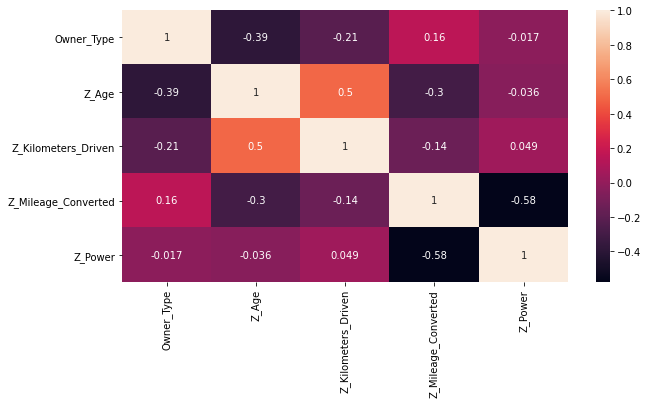

In [209]:
plt.figure(figsize=(10,5))
sns.heatmap(X[['Owner_Type','Z_Age', 'Z_Kilometers_Driven', 'Z_Mileage_Converted', 'Z_Power']].corr(), annot=True)
plt.show()

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [211]:
vf=[vif(Xc[selected_features_BE].values,i) for i in range(Xc[selected_features_BE].shape[1])]
pd.DataFrame(vf,index=Xc[selected_features_BE].columns, columns=['vif'])

vif
const                   67.565589
Owner_Type               1.246489
Brand_Audi               1.772511
Brand_BMW                1.965814
Brand_Bentley            1.016586
Brand_Chevrolet          1.079586
Brand_Datsun             1.019169
Brand_Fiat               1.020324
Brand_Ford               1.206528
Brand_Honda              1.479982
Brand_Hyundai            1.474898
Brand_Jaguar             1.206682
Brand_Lamborghini        1.022631
Brand_Land               1.204686
Brand_Mahindra           1.496130
Brand_Mercedes-Benz      1.993131
Brand_Mini               1.071598
Brand_Mitsubishi         1.072518
Brand_Nissan             1.053222
Brand_Porsche            1.103045
Brand_Renault            1.122566
Brand_Skoda              1.228334
Brand_Tata               1.114357
Brand_Toyota             1.640112
Brand_Volvo              1.073276
Model_Type_SUV/MUV/MPV   2.092832
Location_Bangalore       1.440306
Location_Coimbatore      1.843607
Location_Delhi           1.659845
Location_Hyderabad       1.825276
Location_Jaipur          1.489998
Location_Kochi           1.872668
Location_Kolkata         1.681149
Location_Mumbai          1.950695
Location_Pune            1.682822
Fuel_Type_Diesel         2.374774
Transmission_Manual      2.276193
Z_Age                    2.261742
Z_Kilometers_Driven      1.765217
Z_Mileage_Converted      3.458071
Z_Power                  4.230537

There is no significant multicollinearity among any of the independent variables. Therefore, we will be using this set of independent variables. 

#### 2) Normality of Residuals

In [212]:
residuals=model.resid

In [213]:
residuals

0      -0.040847
1       0.312679
2       0.376974
3       0.157795
4       0.102485
          ...   
5838    0.104053
5839   -0.097074
5840   -0.704752
5841    0.058568
5842    0.182484
Length: 5843, dtype: float64

C:\Users\arunk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



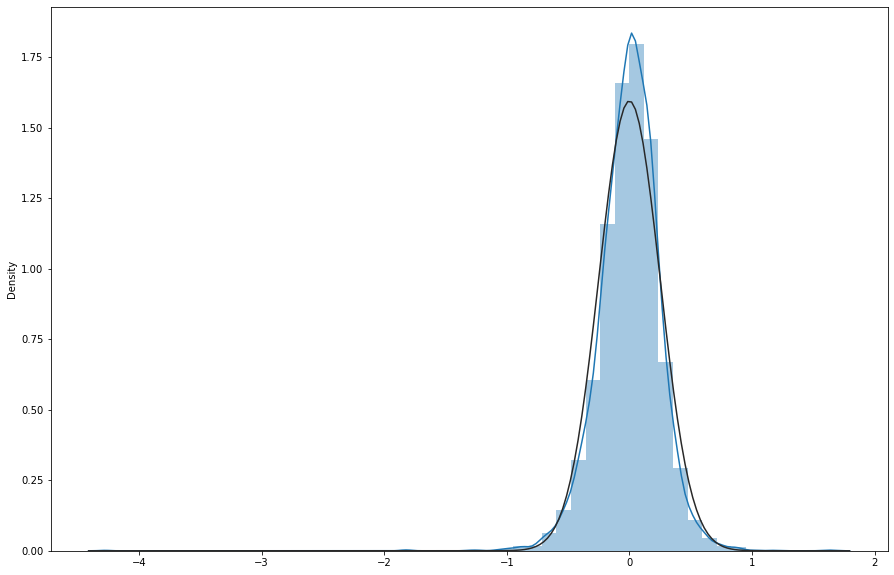

In [214]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit=norm)
plt.show()

The Black curve is ideal normal distribution using same mean and standard deviation as our residual. if the residuals were purely normal, it would have looked like the black curve.

Since the residual plot of this model is almost overlapping or looking like the normal distribution curve (the black curve), we can assume that our residuals are almost normal.

##### QQ Plot

In [215]:
import scipy.stats as stats

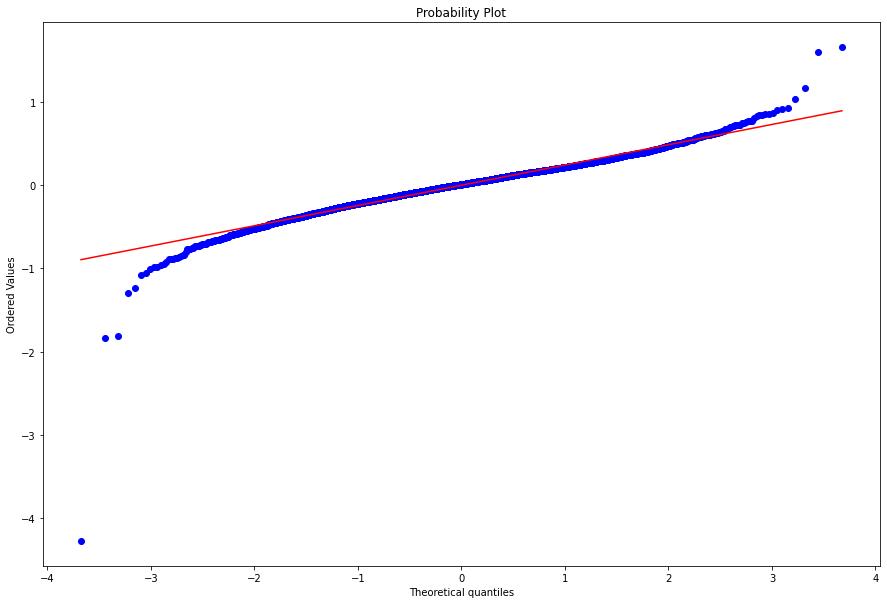

In [216]:
stats.probplot(residuals, plot=plt)
plt.show()

The straight line shows the ideal normal distribution of the residuals.

Most parts of our residuals, except the extremely low and extremely high values, are spread closely around the ideal normal distribution line.
For extremely large and extremely small values for residuals, it is going away from normality by a bit.

##### Jarque Bera

In [217]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=70443.77914090884, pvalue=0.0)


Ho : Data is normal

Ha : Data is not normal
    
Since p-value = 0.0, we will reject Ho and conclude that residuals are not perfectly normal

#### 3) Constant variance of residuals (Homoscedasticity)

In [218]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2174.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:21   Log-Likelihood:                -193.31
No. Observations:                5843   AIC:                             468.6
Df Residuals:                    5802   BIC:                             742.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3605      0.027    -13.355      0.000      -0.413      -0.308
Owner_Type                 0.0749      0.008      9.108      0.000       0.059       0.091
Brand_Audi                 0.6666      0.022     29.897      0.000       0.623       0.710
Brand_BMW                  0.6348      0.022     28.484      0.000       0.591       0.678
Brand_Bentley              1.6936      0.253      6.692      0.000       1.197       2.190
Brand_Chevrolet           -0.3861      0.024    -16.052      0.000      -0.433      -0.339
Brand_Datsun              -0.4642      0.070     -6.598      0.000      -0.602      -0.326
Brand_Fiat                -0.2882      0.053     -5.441      0.000      -0.392      -0.184
Brand_Ford                -0.1177      0.016     -7.136      0.000      -0.150      -0.085
Brand_Honda               -0.0452      0.013     -3.434      0.001      -0.071      -0.019
Brand_Hyundai             -0.0442      0.010     -4.254      0.000      -0.065      -0.024
Brand_Jaguar               0.8683      0.044     19.849      0.000       0.783       0.954
Brand_Lamborghini          2.0402      0.254      8.037      0.000       1.543       2.538
Brand_Land                 0.9132      0.039     23.571      0.000       0.837       0.989
Brand_Mahindra            -0.1818      0.019     -9.469      0.000      -0.219      -0.144
Brand_Mercedes-Benz        0.7386      0.021     35.386      0.000       0.698       0.780
Brand_Mini                 1.1186      0.051     21.904      0.000       1.019       1.219
Brand_Mitsubishi           0.2586      0.050      5.158      0.000       0.160       0.357
Brand_Nissan              -0.0771      0.028     -2.801      0.005      -0.131      -0.023
Brand_Porsche              0.8442      0.066     12.792      0.000       0.715       0.974
Brand_Renault             -0.1599      0.022     -7.148      0.000      -0.204      -0.116
Brand_Skoda                0.0652      0.022      3.011      0.003       0.023       0.108
Brand_Tata                -0.4799      0.020    -24.113      0.000      -0.519      -0.441
Brand_Toyota               0.3059      0.017     18.240      0.000       0.273       0.339
Brand_Volvo                0.4213      0.057      7.411      0.000       0.310       0.533
Model_Type_SUV/MUV/MPV     0.2096      0.011     19.359      0.000       0.188       0.231
Location_Bangalore         0.1464      0.017      8.735      0.000       0.114       0.179
Location_Coimbatore        0.0963      0.014      6.682      0.000       0.068       0.125
Location_Delhi            -0.1187      0.015     -8.145      0.000      -0.147      -0.090
Location_Hyderabad         0.1140      0.014      8.412      0.000       0.087       0.141
Location_Jaipur           -0.0709      0.016     -4.469      0.000      -0.102  

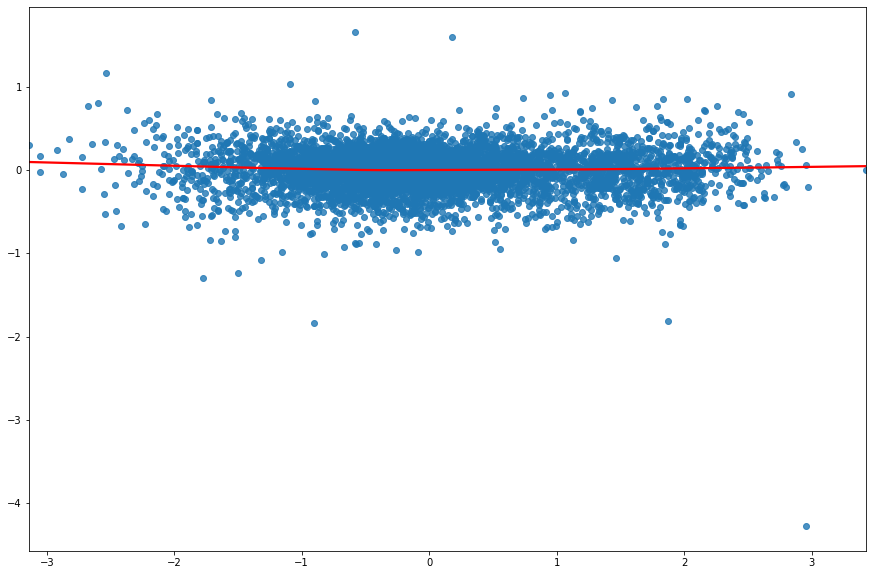

In [219]:
residuals=model.resid
y_pred=model.predict(Xc[selected_features_BE])
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

##### Goldfeld Test

In [220]:
import statsmodels.stats.api as sms
test=sms.het_goldfeldquandt(y=model.resid, x=Xc[selected_features_BE])
test

(1.134495302837339, 0.000355337806243396, 'increasing')

Ho : Variance is constant across the range of data
    
Ha : Variance is not constant across the range of data
    
    Since p-value=0.0003, we will reject Ho and accept Ha to conclude that variance of residuals is not constant across the range of data

#### 4) Linearity of Relationship - checking if the model is appropriate

In [221]:
model=sm.OLS(y,Xc[selected_features_BE]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Z_Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2174.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        07:00:31   Log-Likelihood:                -193.31
No. Observations:                5843   AIC:                             468.6
Df Residuals:                    5802   BIC:                             742.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3605      0.027    -13.355      0.000      -0.413      -0.308
Owner_Type                 0.0749      0.008      9.108      0.000       0.059       0.091
Brand_Audi                 0.6666      0.022     29.897      0.000       0.623       0.710
Brand_BMW                  0.6348      0.022     28.484      0.000       0.591       0.678
Brand_Bentley              1.6936      0.253      6.692      0.000       1.197       2.190
Brand_Chevrolet           -0.3861      0.024    -16.052      0.000      -0.433      -0.339
Brand_Datsun              -0.4642      0.070     -6.598      0.000      -0.602      -0.326
Brand_Fiat                -0.2882      0.053     -5.441      0.000      -0.392      -0.184
Brand_Ford                -0.1177      0.016     -7.136      0.000      -0.150      -0.085
Brand_Honda               -0.0452      0.013     -3.434      0.001      -0.071      -0.019
Brand_Hyundai             -0.0442      0.010     -4.254      0.000      -0.065      -0.024
Brand_Jaguar               0.8683      0.044     19.849      0.000       0.783       0.954
Brand_Lamborghini          2.0402      0.254      8.037      0.000       1.543       2.538
Brand_Land                 0.9132      0.039     23.571      0.000       0.837       0.989
Brand_Mahindra            -0.1818      0.019     -9.469      0.000      -0.219      -0.144
Brand_Mercedes-Benz        0.7386      0.021     35.386      0.000       0.698       0.780
Brand_Mini                 1.1186      0.051     21.904      0.000       1.019       1.219
Brand_Mitsubishi           0.2586      0.050      5.158      0.000       0.160       0.357
Brand_Nissan              -0.0771      0.028     -2.801      0.005      -0.131      -0.023
Brand_Porsche              0.8442      0.066     12.792      0.000       0.715       0.974
Brand_Renault             -0.1599      0.022     -7.148      0.000      -0.204      -0.116
Brand_Skoda                0.0652      0.022      3.011      0.003       0.023       0.108
Brand_Tata                -0.4799      0.020    -24.113      0.000      -0.519      -0.441
Brand_Toyota               0.3059      0.017     18.240      0.000       0.273       0.339
Brand_Volvo                0.4213      0.057      7.411      0.000       0.310       0.533
Model_Type_SUV/MUV/MPV     0.2096      0.011     19.359      0.000       0.188       0.231
Location_Bangalore         0.1464      0.017      8.735      0.000       0.114       0.179
Location_Coimbatore        0.0963      0.014      6.682      0.000       0.068       0.125
Location_Delhi            -0.1187      0.015     -8.145      0.000      -0.147      -0.090
Location_Hyderabad         0.1140      0.014      8.412      0.000       0.087       0.141
Location_Jaipur           -0.0709      0.016     -4.469      0.000      -0.102  

In [222]:
residuals=model.resid
y_pred=model.predict(Xc[selected_features_BE])

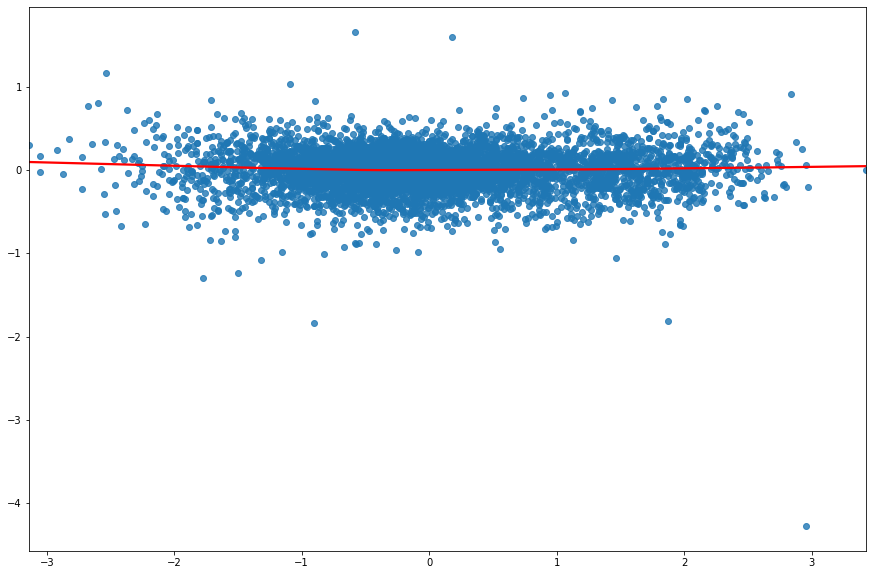

In [223]:
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

Red line shows the broad pattern of data. The plotted red line of the residual plot, is approximately horizontal at Zero (with the residuals scattered around the 0 line). The residuals are not showing any obviously predominant pattern in the residual plot.

Hence, we can assume that our linear model is appropriate.

##### Rainbow test

In [224]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model,frac=0.5)

(0.9872052536703723, 0.6356677818904527)

Ho : Fit of sample using full sample = fit of model using a central subset (linear relationship)

Ha : Fit of sample using full sample is worse compared to fit of model using a central subset
    
    Since p-value (0.63) is higher than significance level (0.05), we will accept Ho to conclude that our model is appropriate

###### Based on the above linear regression assumption diagnostic checks,  we will be using the 'cars_scaling' dataset for the further modelling steps.